In [ ]:
pip install statsmodels==0.12.2

     |████████████████████████████████| 9.5 MB 4.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.4 MB/s 


In [ ]:
pip install yfinance


     |████████████████████████████████| 6.4 MB 6.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps

import datetime
from datetime import timedelta,date
from dateutil.relativedelta import relativedelta
from pylab import rcParams


In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

#Accuracy = (100-(mape*100))
#print('Accuracy : ',format(Accuracy,'.2f')+'%')

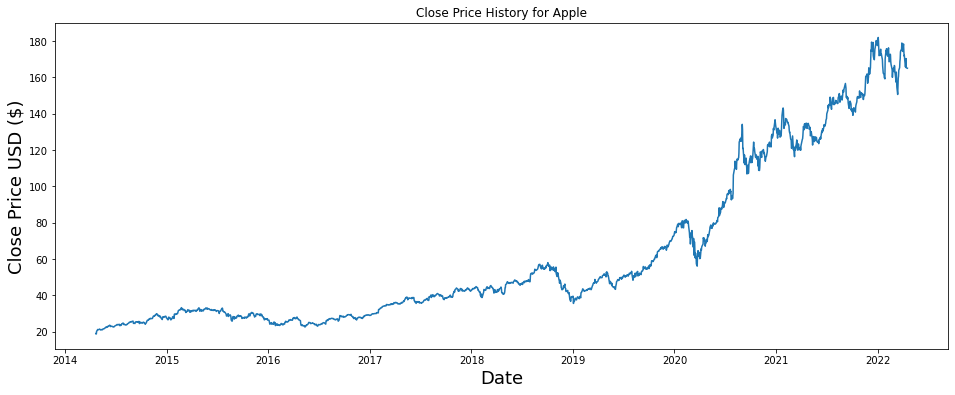

No handles with labels found to put in legend.


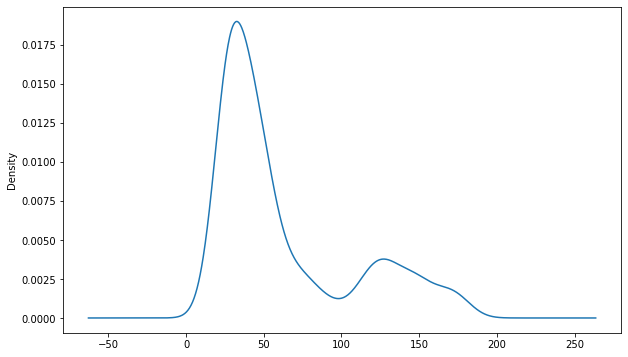

<Figure size 720x432 with 0 Axes>

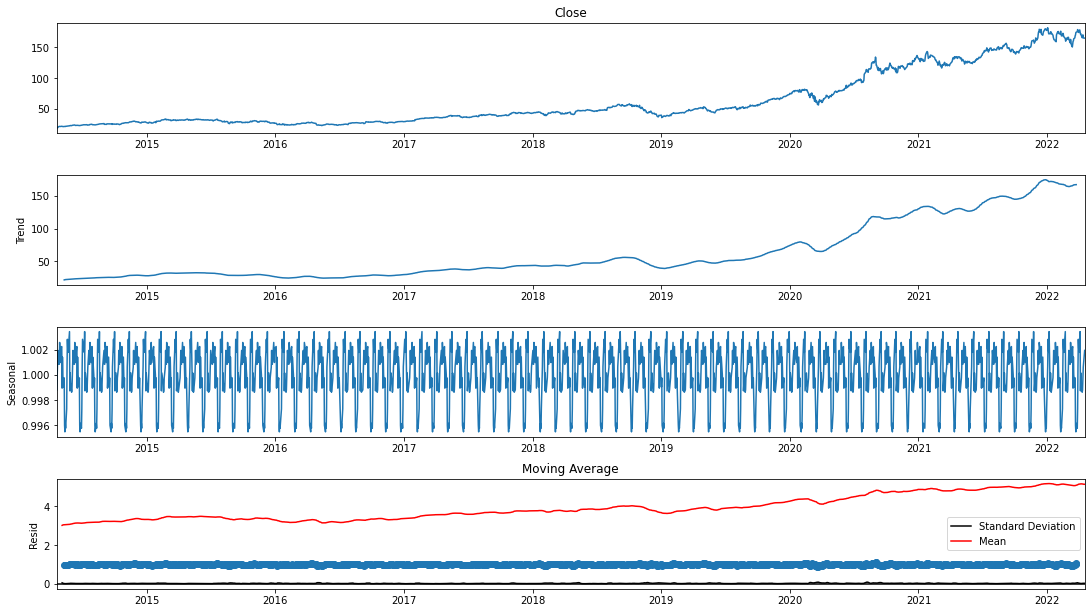

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9376.952, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9391.672, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9391.336, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9372.815, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9389.765, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9389.802, Time=0.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9387.733, Time=1.46 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-9386.272, Time=0.17 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 4.159 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1809
Model:               SARIMAX(1, 1, 0)   Log Likelihood                4698.836
Date:                Tue, 19 Apr 2022   AIC                          -9391.672
Time:                       

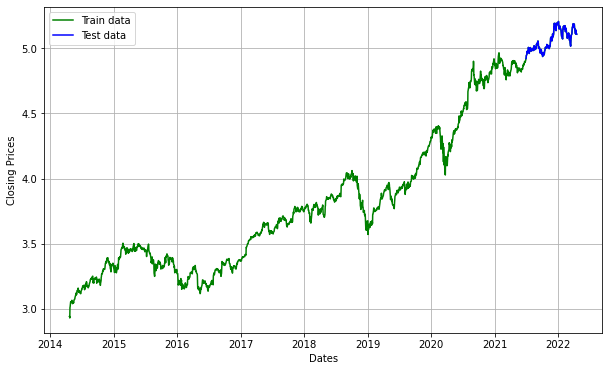

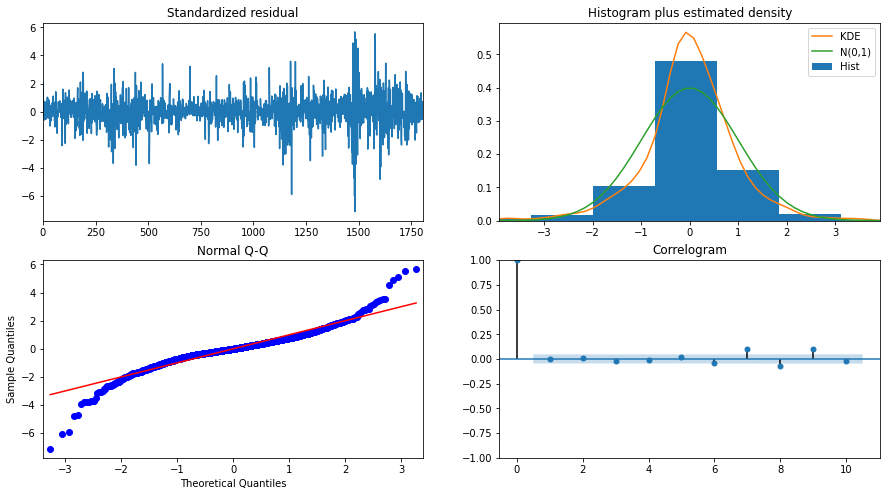

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


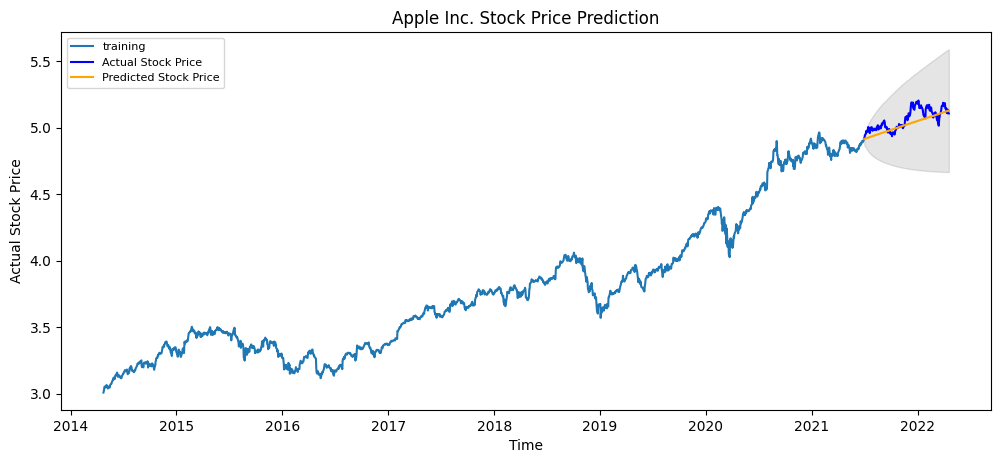

MSE: 0.0038773111889645875
MAE: 0.04954358917154804
RMSE: 0.06226805913921348
MAPE: 0.009725368572316715


In [ ]:
def AAPL_ARIMA():
  AAPL   = yf.download('AAPL',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  AAPL_df = pd.DataFrame(AAPL)
  AAPL_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for Apple')
  plt.plot(AAPL_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  AAPL_df_close = AAPL_df['Close']
  AAPL_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(AAPL_df_close)

  result = seasonal_decompose(AAPL_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  AAPL_df_log = np.log(AAPL_df_close)
  moving_avg = AAPL_df_log.rolling(12).mean()
  std_dev = AAPL_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = AAPL_df_log[3:int(len(AAPL_df_log)*0.9)], AAPL_df_log[int(len(AAPL_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(AAPL_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(2,1,1))
  fitted = model.fit()
  #print(fitted.summary())
  fc, se, conf = fitted.forecast(202,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('Apple Inc. Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

AAPL_ARIMA()




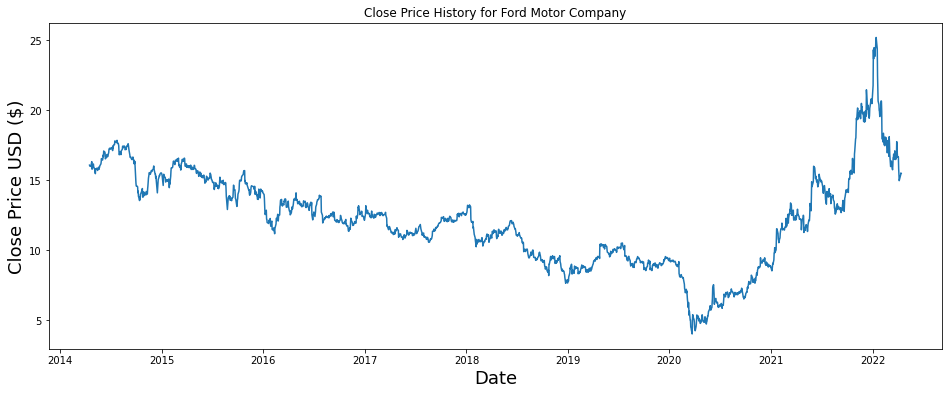

No handles with labels found to put in legend.


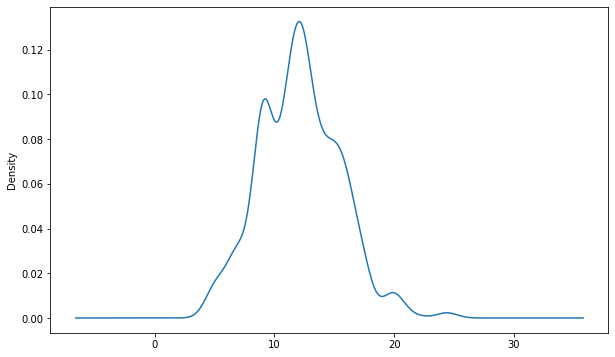

<Figure size 720x432 with 0 Axes>

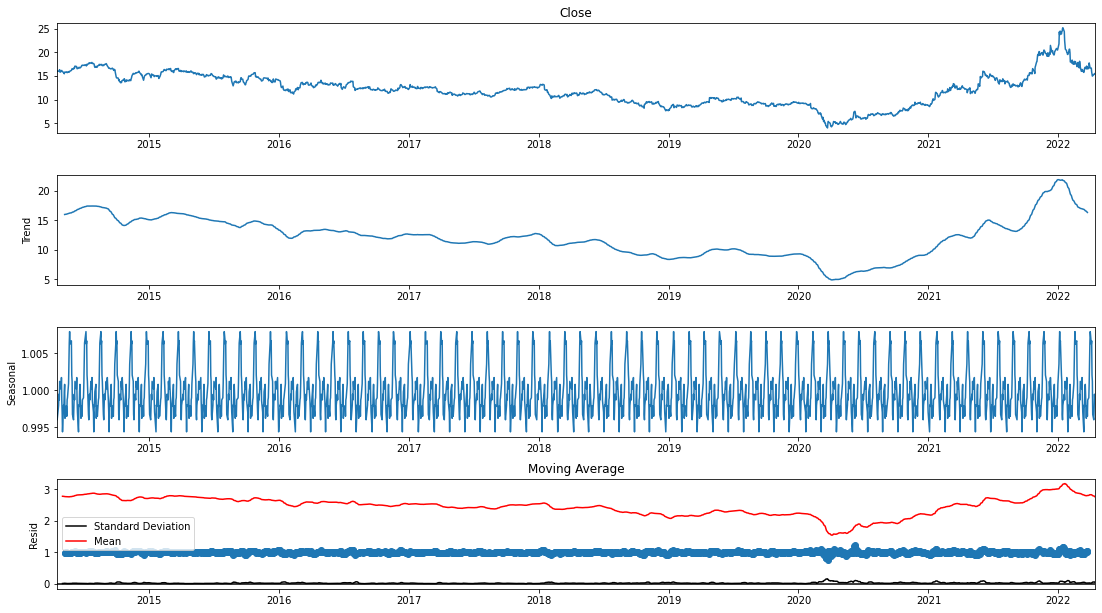

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8968.341, Time=0.72 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8967.236, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8967.200, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8970.333, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8965.383, Time=0.80 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.040 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1810
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4486.167
Date:                Sat, 16 Apr 2022   AIC                          -8970.333
Time:                        16:32:19   BIC                          -8964.833
Sample:                             0   HQIC                         -8968.303
                               - 1810                                  

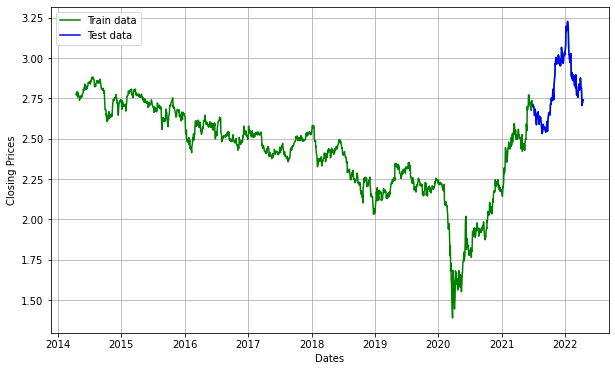

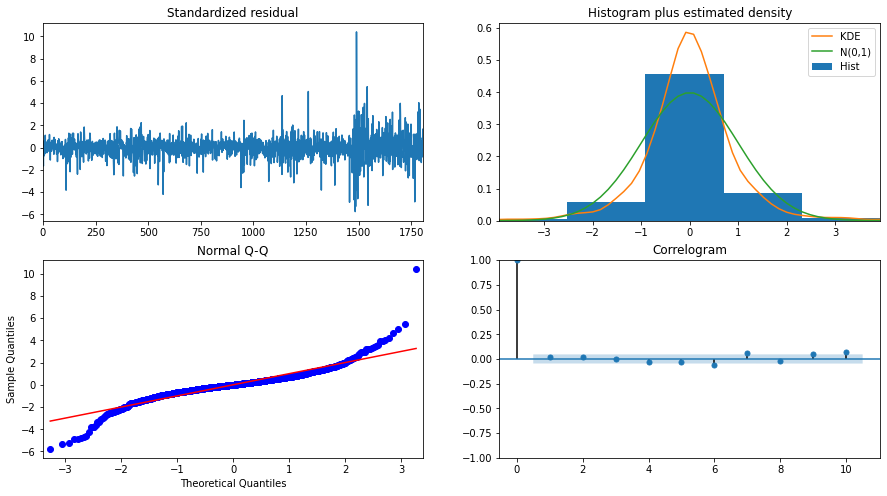

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1809
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4486.170
Method:                           css   S.D. of innovations              0.020
Date:                Sat, 16 Apr 2022   AIC                          -8968.341
Time:                        16:32:21   BIC                          -8957.340
Sample:                             1   HQIC                         -8964.281
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.06e-05      0.000     -0.085      0.932      -0.001       0.001


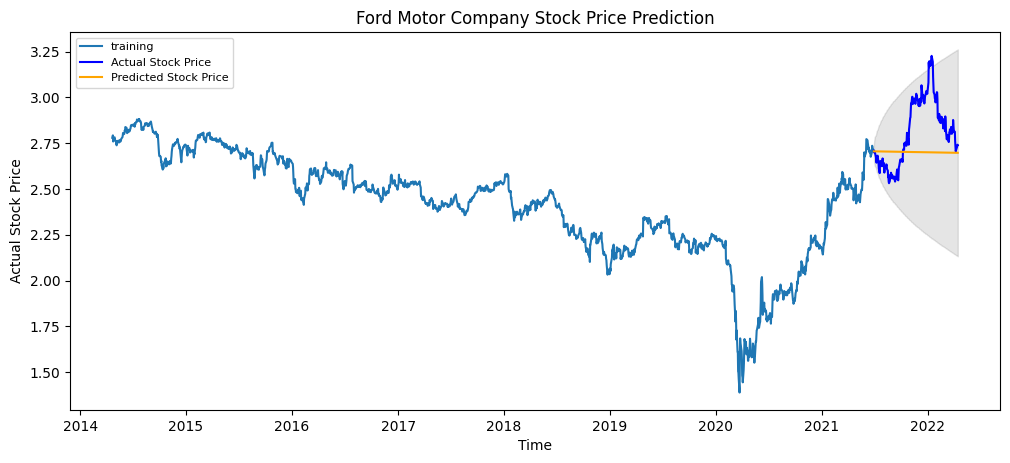

MSE: 0.044773126339469324
MAE: 0.17149914574260208
RMSE: 0.21159661230622132
MAPE: 0.05897317877443349


In [ ]:
def F_ARIMA():
  F = yf.download('F',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  F_df = pd.DataFrame(F)
  F_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for Ford Motor Company')
  plt.plot(F_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  F_df_close = F_df['Close']
  F_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(F_df_close)

  result = seasonal_decompose(F_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  F_df_log = np.log(F_df_close)
  moving_avg = F_df_log.rolling(12).mean()
  std_dev = F_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = F_df_log[3:int(len(F_df_log)*0.9)], F_df_log[int(len(F_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(F_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(0,1,0))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(202,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('Ford Motor Company Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))


F_ARIMA()




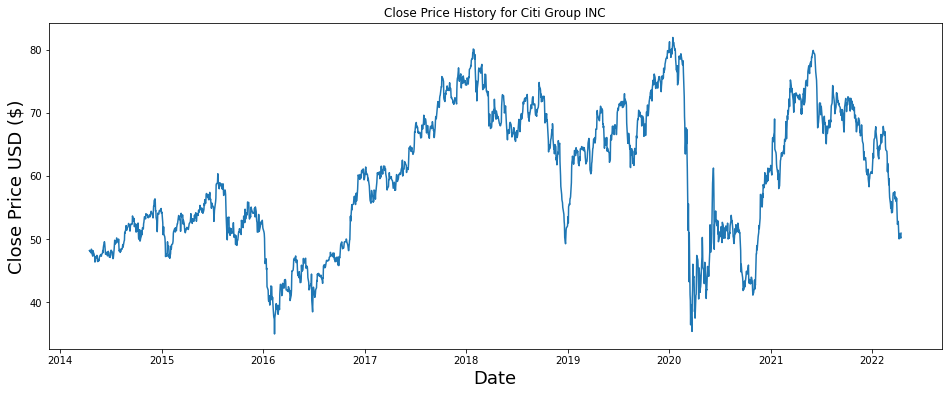

No handles with labels found to put in legend.


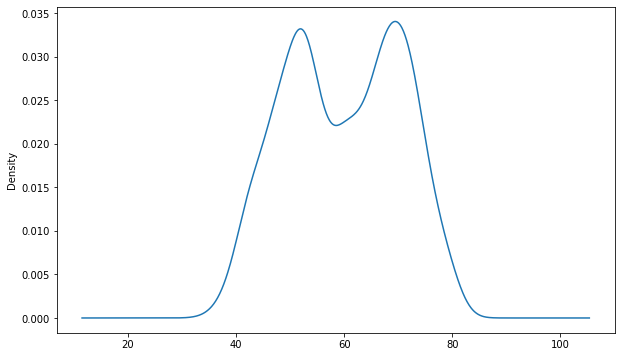

<Figure size 720x432 with 0 Axes>

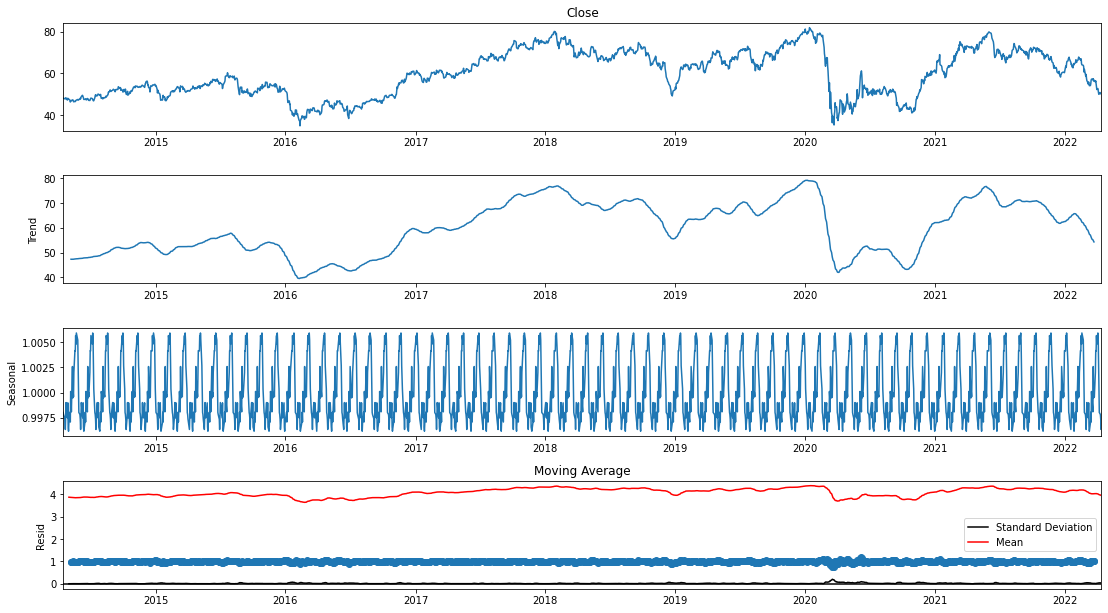

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8758.108, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8769.161, Time=1.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8767.621, Time=2.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8759.918, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-8774.238, Time=1.76 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-8773.149, Time=1.95 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8771.574, Time=2.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8770.306, Time=2.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-8770.985, Time=1.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-8776.039, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-8770.937, Time=0.30 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-8774.959, Time=2.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-8773.370, Time=1.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-8772.088, Time=1.03 sec
 ARIMA(3,1,1)(0,0,0

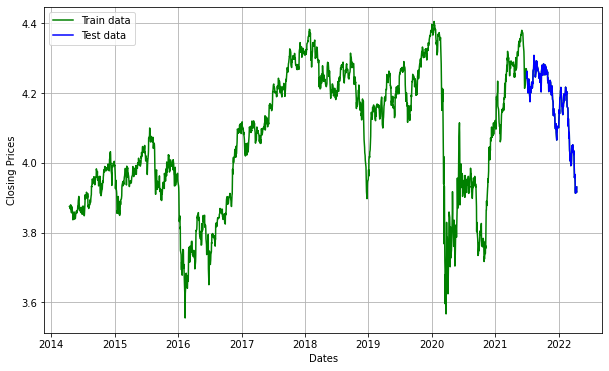

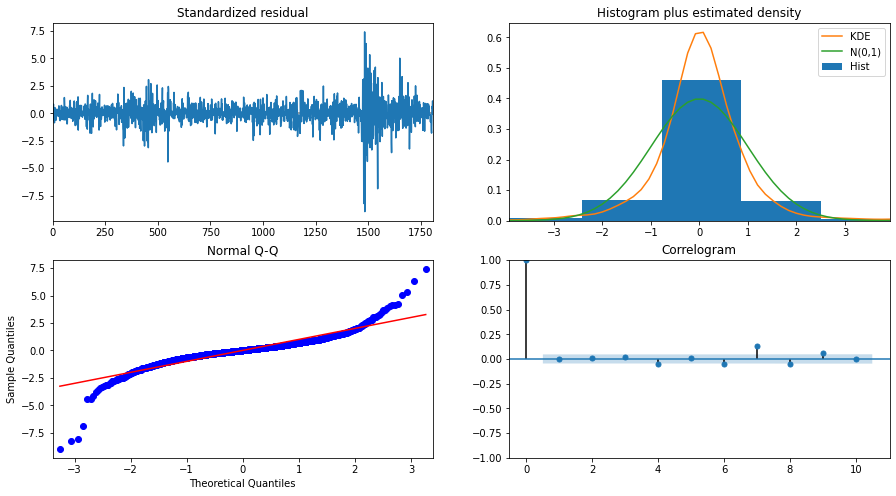

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1809
Model:                 ARIMA(2, 1, 0)   Log Likelihood                4391.119
Method:                       css-mle   S.D. of innovations              0.021
Date:                Sat, 16 Apr 2022   AIC                          -8774.238
Time:                        16:32:46   BIC                          -8752.236
Sample:                             1   HQIC                         -8766.118
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      0.446      0.656      -0.001       0.001
ar.L1.D.Close    -0.0795      0.023     -3.388      0.001      -0.125      -0.033
ar.L2.D.Close     0.0624      0.023     

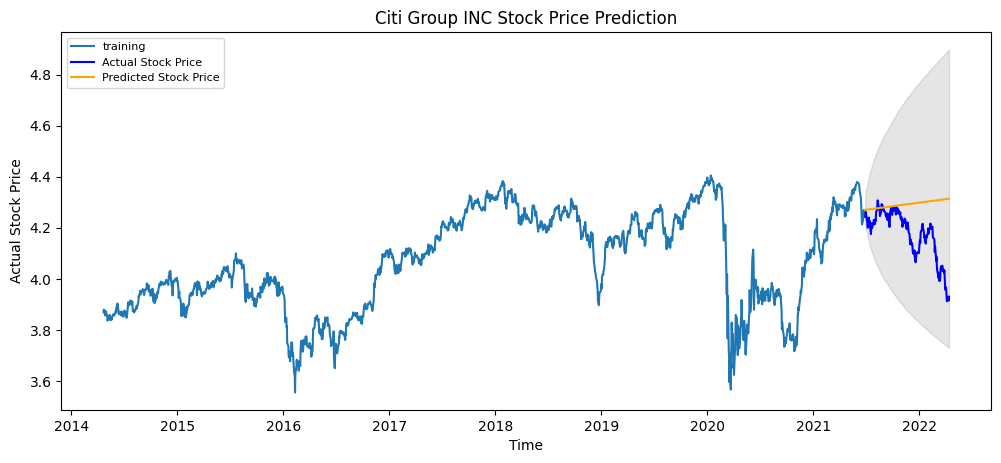

MSE: 0.02481331557865464
MAE: 0.11754212481425794
RMSE: 0.15752242881143827
MAPE: 0.028749671989840724


In [ ]:
def C_ARIMA():
  C = yf.download('C',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  C_df = pd.DataFrame(C)
  C_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for Citi Group INC')
  plt.plot(C_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  C_df_close = C_df['Close']
  C_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(C_df_close)

  result = seasonal_decompose(C_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  C_df_log = np.log(C_df_close)
  moving_avg = C_df_log.rolling(12).mean()
  std_dev = C_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = C_df_log[3:int(len(C_df_log)*0.9)], C_df_log[int(len(C_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(C_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(2,1,0))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(202,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('Citi Group INC Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))


C_ARIMA()




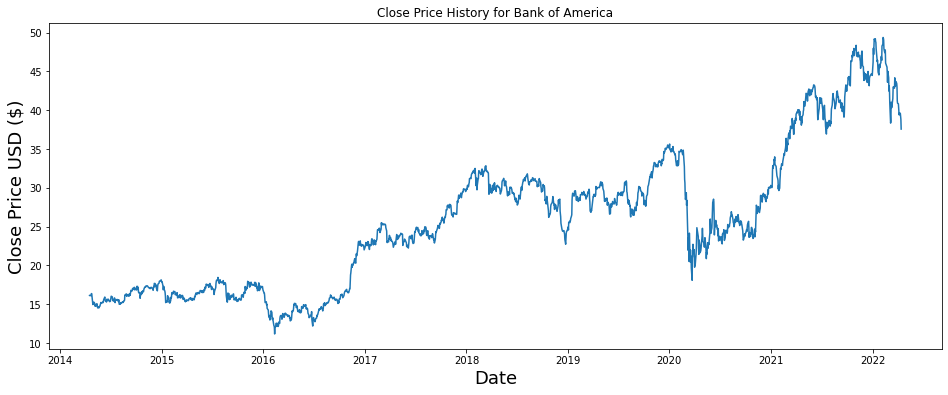

No handles with labels found to put in legend.


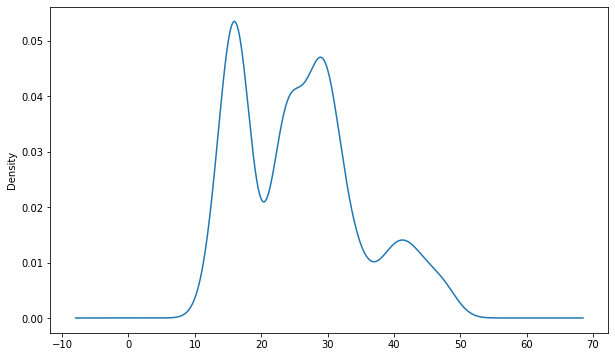

<Figure size 720x432 with 0 Axes>

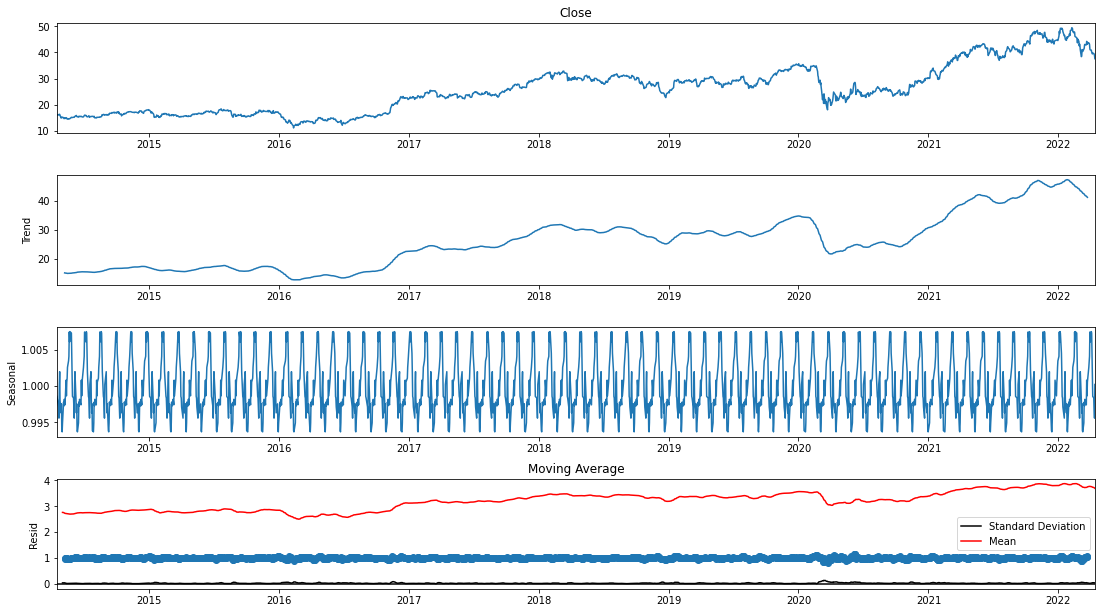

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8985.198, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8998.381, Time=0.61 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8996.525, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8986.006, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9003.912, Time=1.35 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-9001.913, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9001.911, Time=1.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9000.446, Time=2.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-8999.905, Time=1.37 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-9004.653, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-8998.952, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-9002.657, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-9002.648, Time=0.73 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-8998.449, Time=0.55 sec
 ARIMA(3,1,1)(0,0,0

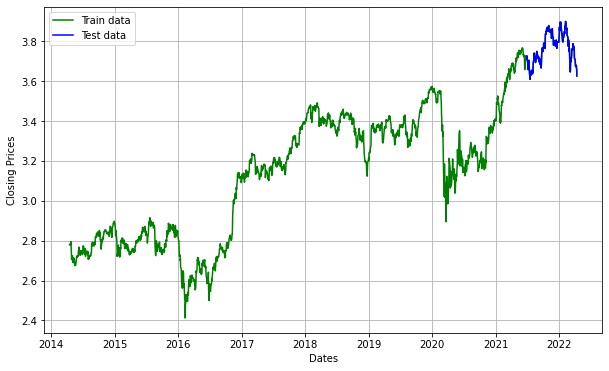

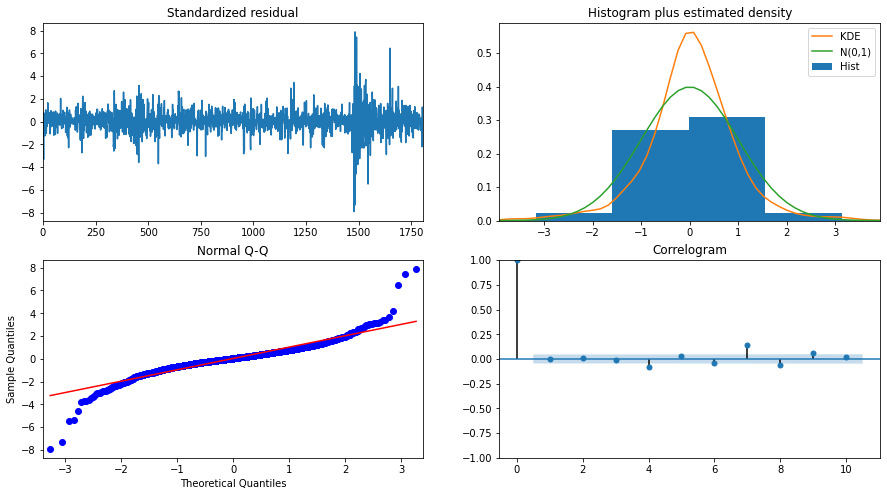

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1809
Model:                 ARIMA(2, 1, 1)   Log Likelihood                4505.956
Method:                       css-mle   S.D. of innovations              0.020
Date:                Sat, 16 Apr 2022   AIC                          -9001.913
Time:                        16:33:06   BIC                          -8974.410
Sample:                             1   HQIC                         -8991.763
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.000      1.123      0.262      -0.000       0.001
ar.L1.D.Close    -0.0824      0.193     -0.426      0.670      -0.461       0.296
ar.L2.D.Close     0.0647      0.029     

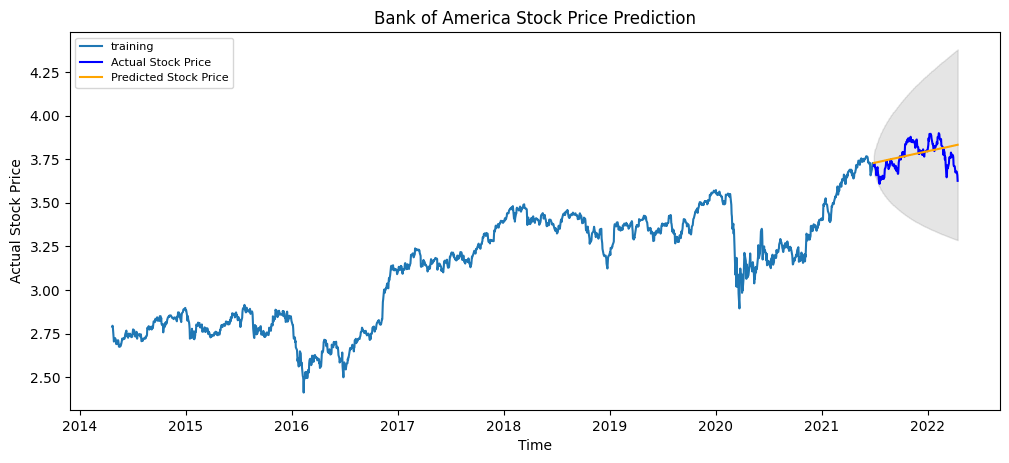

MSE: 0.004847934097938413
MAE: 0.05561611014508168
RMSE: 0.06962710749369395
MAPE: 0.014826039494626535


In [ ]:
def BAC_ARIMA():
  BAC   = yf.download('BAC',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  BAC_df = pd.DataFrame(BAC)
  BAC_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for Bank of America')
  plt.plot(BAC_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  BAC_df_close = BAC_df['Close']
  BAC_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(BAC_df_close)

  result = seasonal_decompose(BAC_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  BAC_df_log = np.log(BAC_df_close)
  moving_avg = BAC_df_log.rolling(12).mean()
  std_dev = BAC_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = BAC_df_log[3:int(len(BAC_df_log)*0.9)], BAC_df_log[int(len(BAC_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(BAC_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(2,1,1))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(202,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('Bank of America Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

BAC_ARIMA()




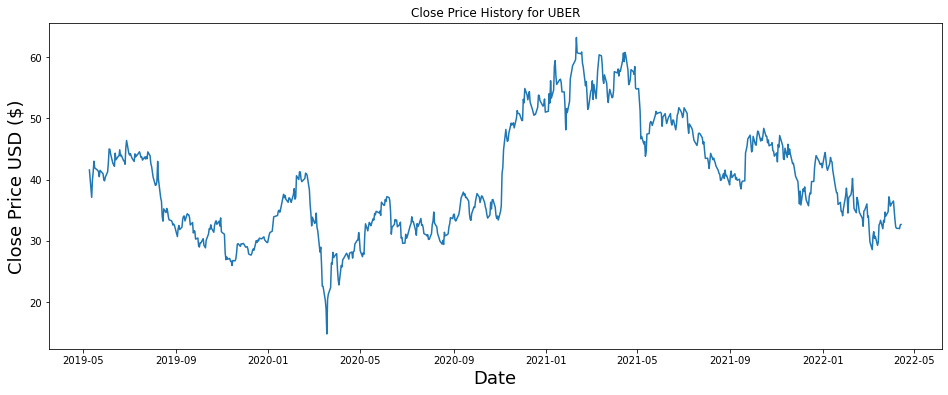

No handles with labels found to put in legend.


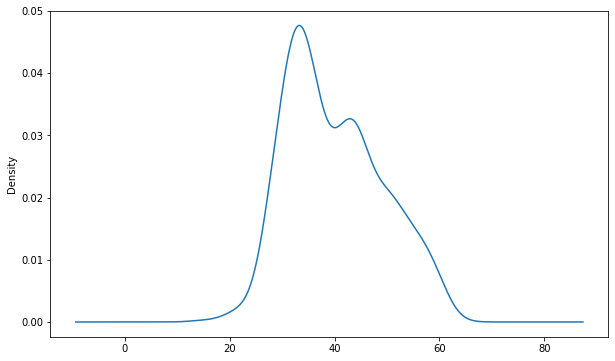

<Figure size 720x432 with 0 Axes>

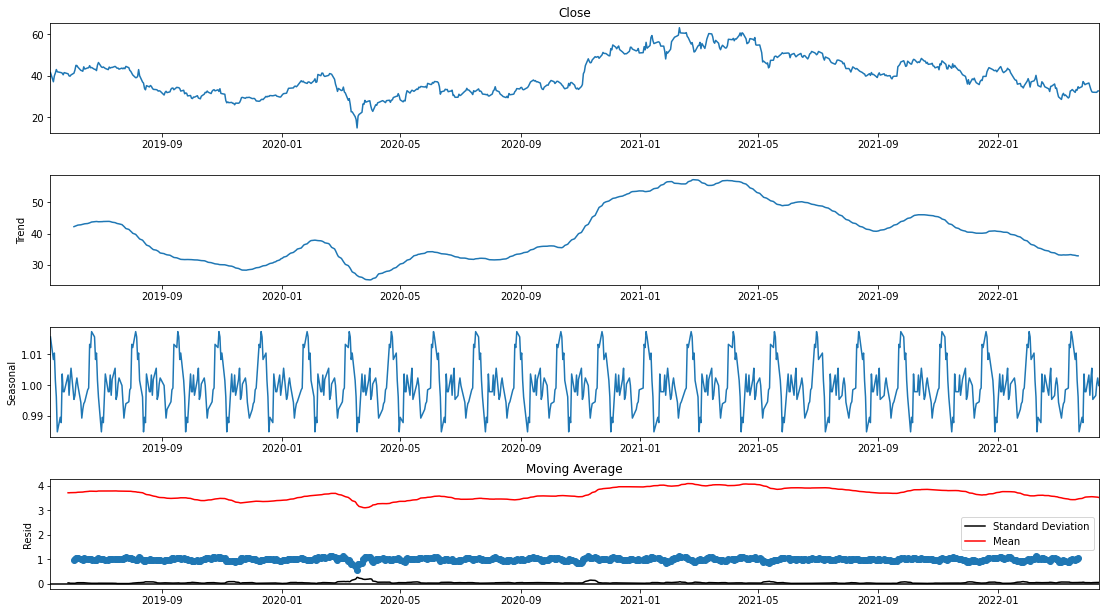

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2515.780, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2514.117, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2514.052, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2517.779, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2511.790, Time=0.88 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.087 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  663
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1259.890
Date:                Sat, 16 Apr 2022   AIC                          -2517.779
Time:                        16:33:11   BIC                          -2513.284
Sample:                             0   HQIC                         -2516.037
                                - 663                                  

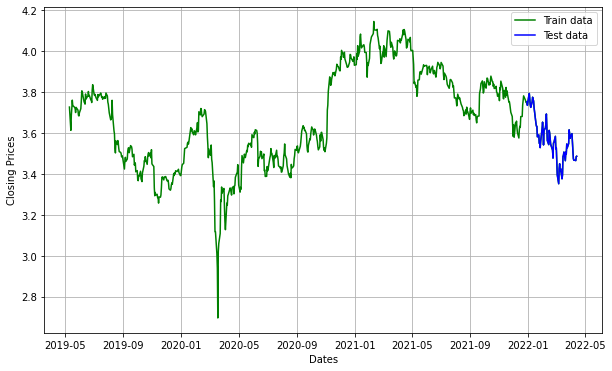

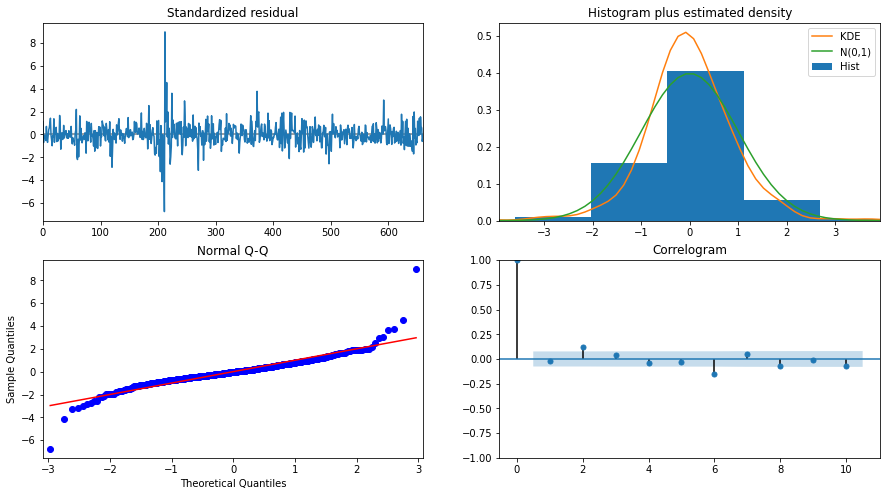

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  662
Model:                 ARIMA(0, 1, 0)   Log Likelihood                1259.890
Method:                           css   S.D. of innovations              0.036
Date:                Sat, 16 Apr 2022   AIC                          -2515.780
Time:                        16:33:13   BIC                          -2506.789
Sample:                             1   HQIC                         -2512.296
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.221e-05      0.001      0.030      0.976      -0.003       0.003


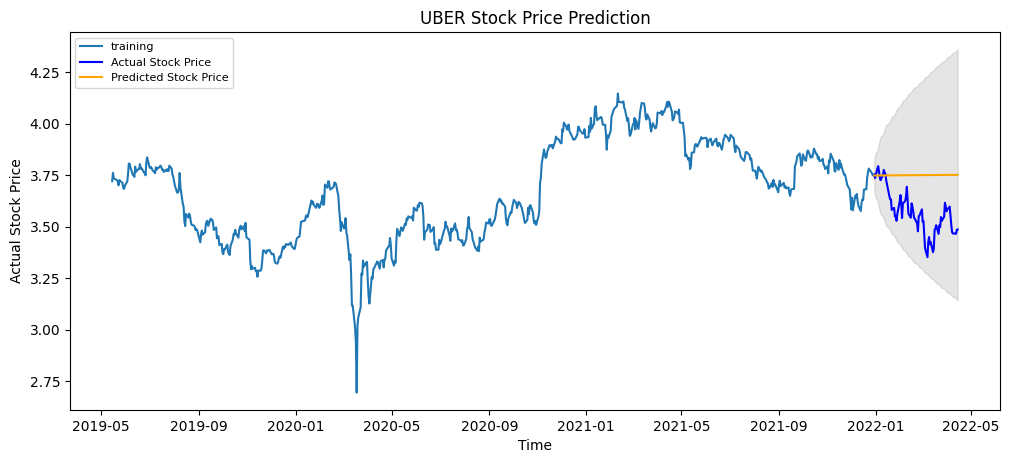

MSE: 0.043297574146568596
MAE: 0.18243141008949645
RMSE: 0.20808069143139782
MAPE: 0.05194541085506996


In [ ]:
def UBER_ARIMA():
  UBER = yf.download('UBER',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  UBER_df = pd.DataFrame(UBER)
  UBER_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for UBER')
  plt.plot(UBER_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  UBER_df_close = UBER_df['Close']
  UBER_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(UBER_df_close)

  result = seasonal_decompose(UBER_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  UBER_df_log = np.log(UBER_df_close)
  moving_avg = UBER_df_log.rolling(12).mean()
  std_dev = UBER_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = UBER_df_log[3:int(len(UBER_df_log)*0.9)], UBER_df_log[int(len(UBER_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(UBER_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(0,1,0))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(74,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('UBER Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

UBER_ARIMA()




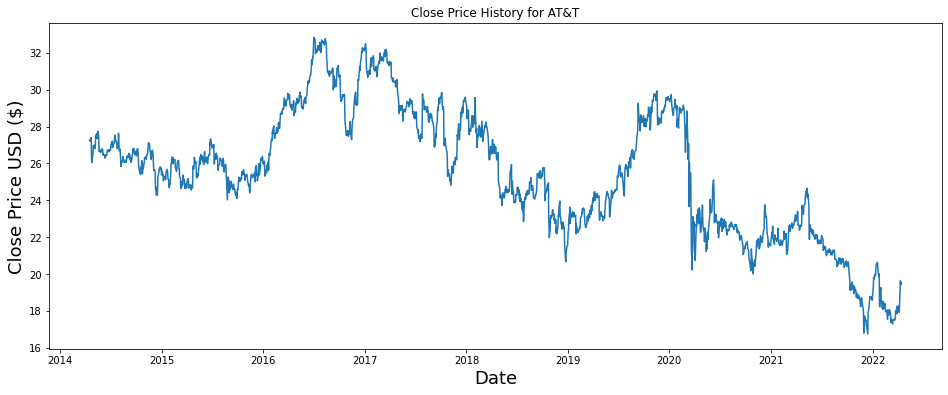

No handles with labels found to put in legend.


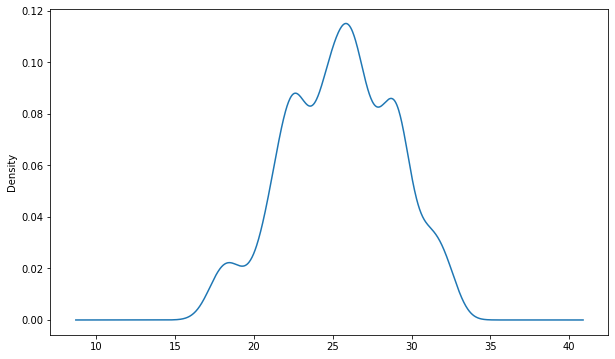

<Figure size 720x432 with 0 Axes>

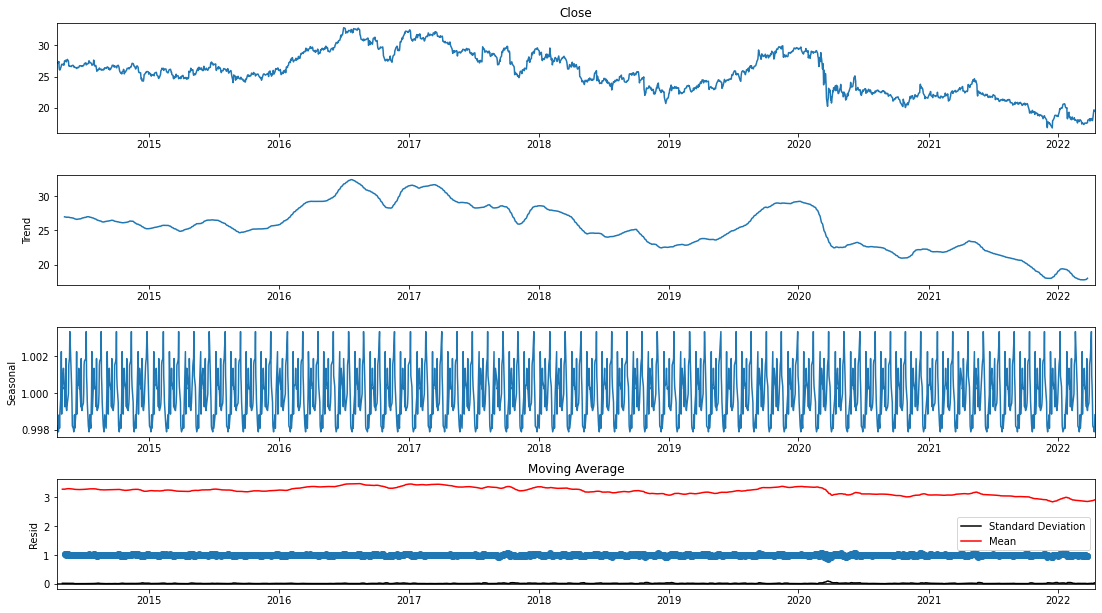

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10429.756, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10433.019, Time=0.77 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10432.762, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10431.594, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-10432.368, Time=0.83 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10426.193, Time=1.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-10430.220, Time=2.29 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-10434.841, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-10434.198, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-10428.041, Time=1.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-10434.585, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-10433.170, Time=1.46 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 10.981 seconds
                               SARIMAX Results                 

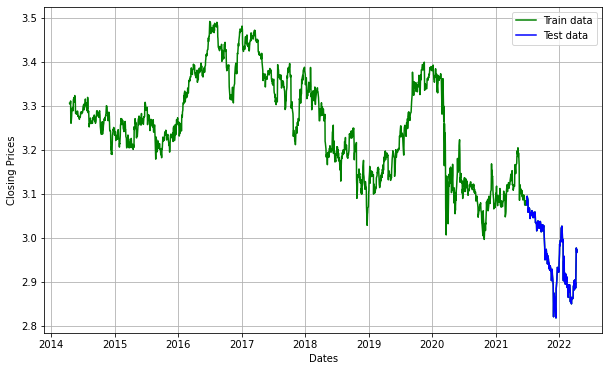

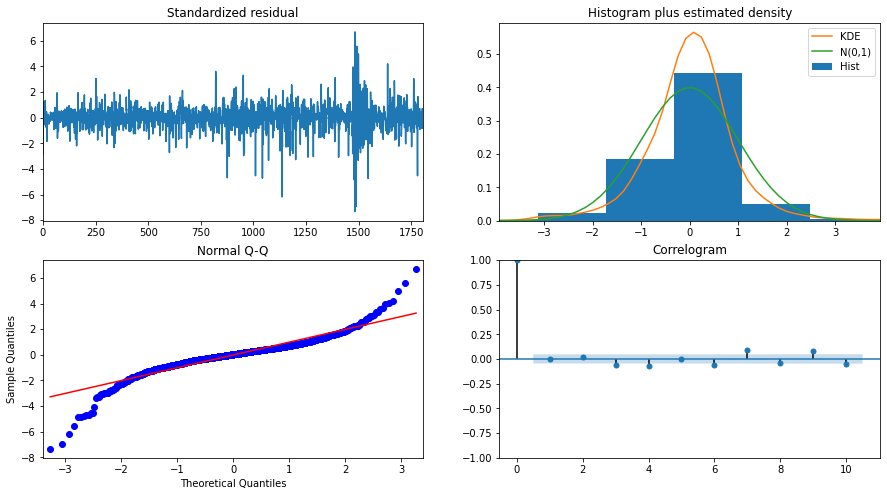

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1809
Model:                 ARIMA(1, 1, 0)   Log Likelihood                5219.510
Method:                       css-mle   S.D. of innovations              0.014
Date:                Sat, 16 Apr 2022   AIC                         -10433.019
Time:                        16:33:28   BIC                         -10416.518
Sample:                             1   HQIC                        -10426.929
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001      0.000     -0.421      0.674      -0.001       0.000
ar.L1.D.Close    -0.0540      0.024     -2.296      0.022      -0.100      -0.008
                                    Root

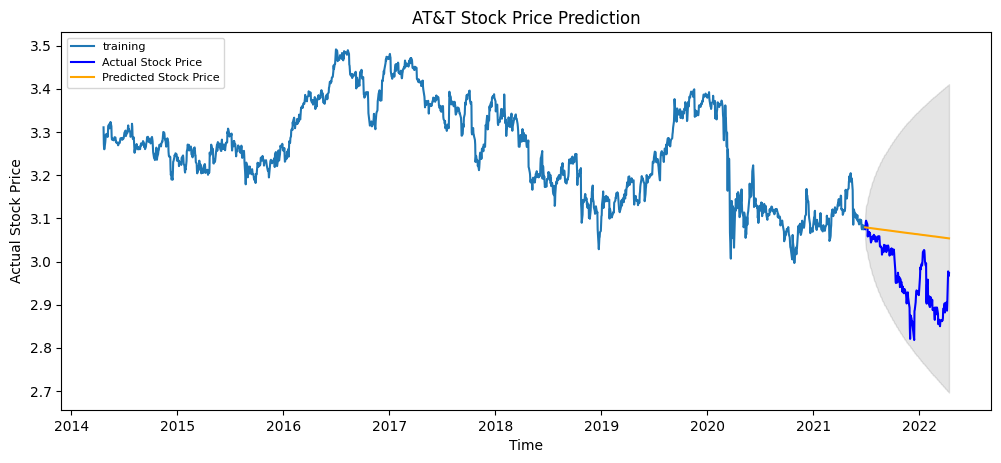

MSE: 0.015161486121864057
MAE: 0.10421305258724513
RMSE: 0.1231319865910725
MAPE: 0.03573586597963737


In [ ]:
def T_ARIMA():
  T = yf.download('T',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  T_df = pd.DataFrame(T)
  T_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for AT&T')
  plt.plot(T_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  T_df_close = T_df['Close']
  T_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(T_df_close)

  result = seasonal_decompose(T_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  T_df_log = np.log(T_df_close)
  moving_avg = T_df_log.rolling(12).mean()
  std_dev = T_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = T_df_log[3:int(len(T_df_log)*0.9)], T_df_log[int(len(T_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(T_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(1,1,0))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(202,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('AT&T Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

T_ARIMA()




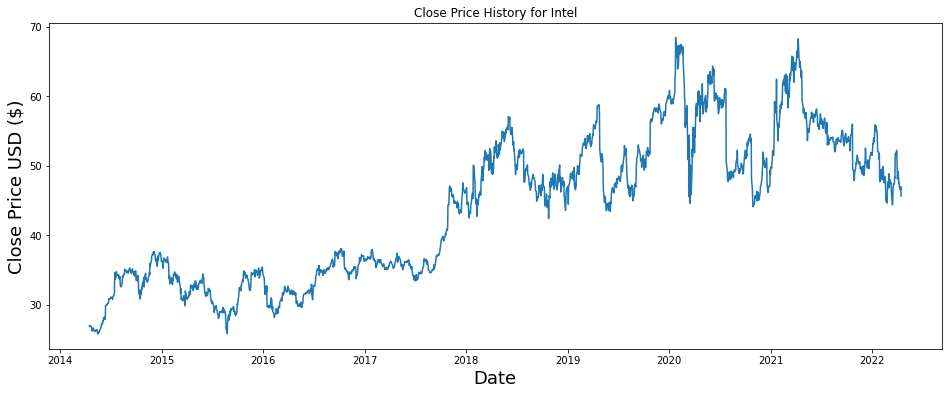

No handles with labels found to put in legend.


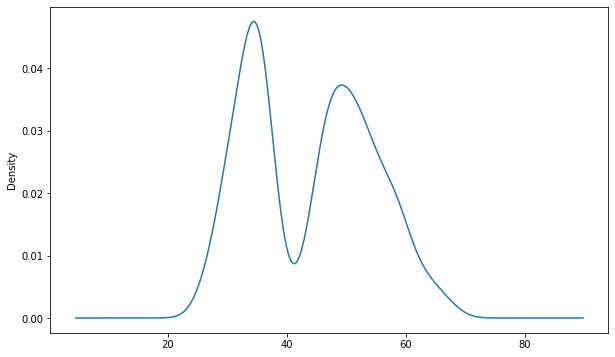

<Figure size 720x432 with 0 Axes>

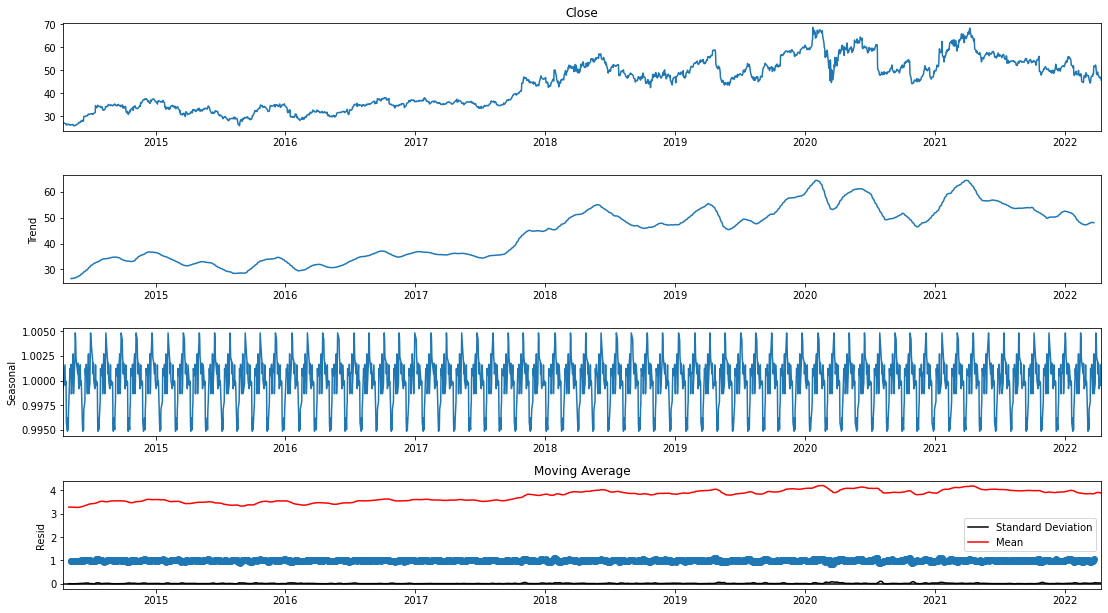

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9916.375, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.81 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9059.081, Time=1.64 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=2.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-9077.805, Time=2.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5072.632, Time=0.77 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=3.00 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-9078.811, Time=2.87 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=3045.320, Time=1.32 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=5.83 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-9083.131, Time=1.45 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-5035.061, Time=3.88 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-9081.298, Time=0.50 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-9094.138,

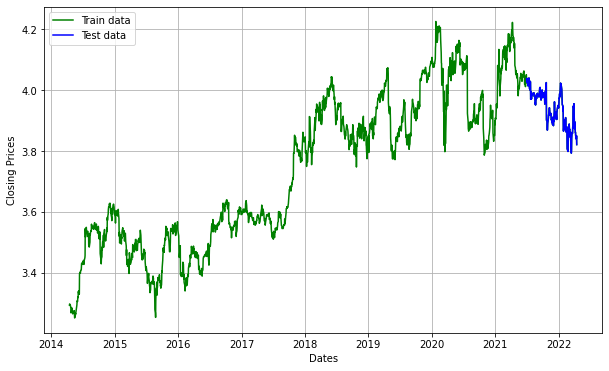

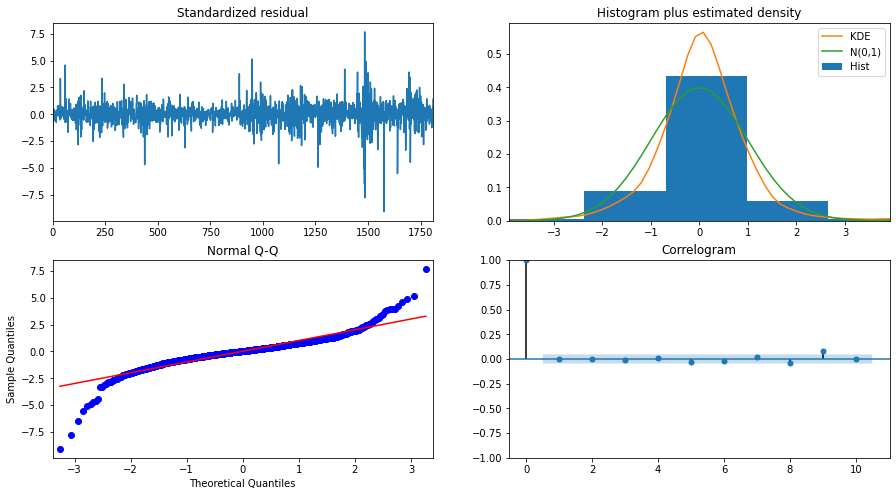

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1810
Model:                     ARMA(2, 3)   Log Likelihood                4554.081
Method:                       css-mle   S.D. of innovations              0.020
Date:                Sat, 16 Apr 2022   AIC                          -9094.161
Time:                        16:34:12   BIC                          -9055.654
Sample:                             0   HQIC                         -9079.950
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.7141      0.159     23.398      0.000       3.403       4.025
ar.L1.Close     0.1941      0.061      3.157      0.002       0.074       0.315
ar.L2.Close     0.8018      0.061     13.060    

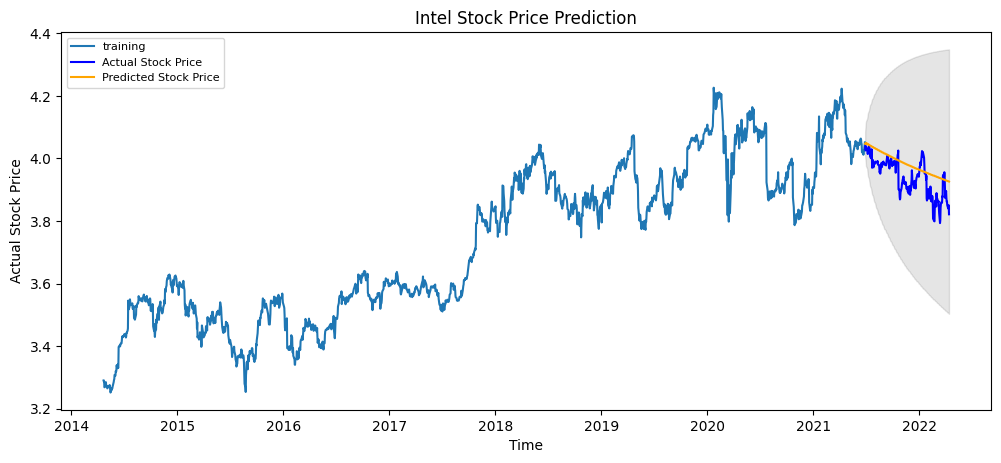

MSE: 0.0034565601016978845
MAE: 0.04957078353945095
RMSE: 0.05879251739548056
MAPE: 0.012684961446306042


In [ ]:
def INTC_ARIMA():
  INTC = yf.download('INTC',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  INTC_df = pd.DataFrame(INTC)
  INTC_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for Intel')
  plt.plot(INTC_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  INTC_df_close = INTC_df['Close']
  INTC_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(INTC_df_close)

  result = seasonal_decompose(INTC_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  INTC_df_log = np.log(INTC_df_close)
  moving_avg = INTC_df_log.rolling(12).mean()
  std_dev = INTC_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = INTC_df_log[3:int(len(INTC_df_log)*0.9)], INTC_df_log[int(len(INTC_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(INTC_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(2,0,3))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(202,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('Intel Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

INTC_ARIMA()




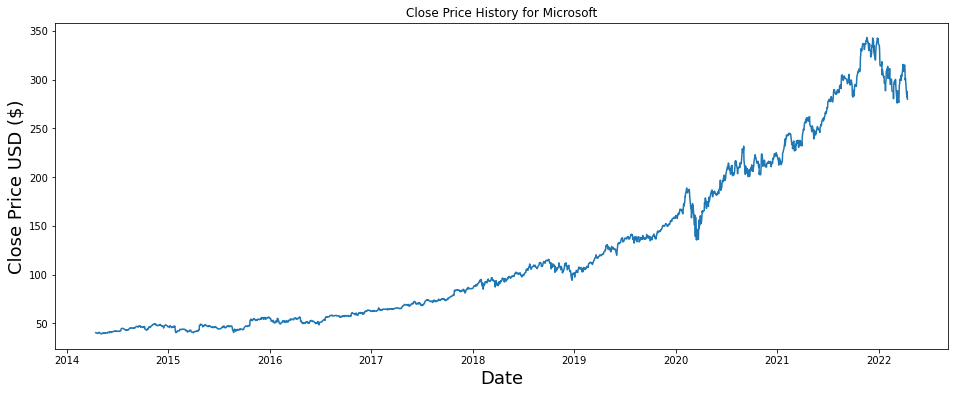

No handles with labels found to put in legend.


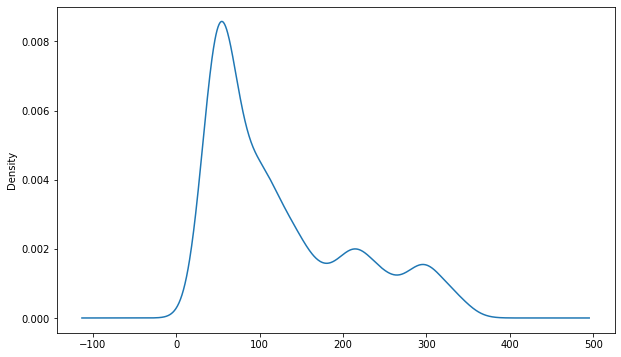

<Figure size 720x432 with 0 Axes>

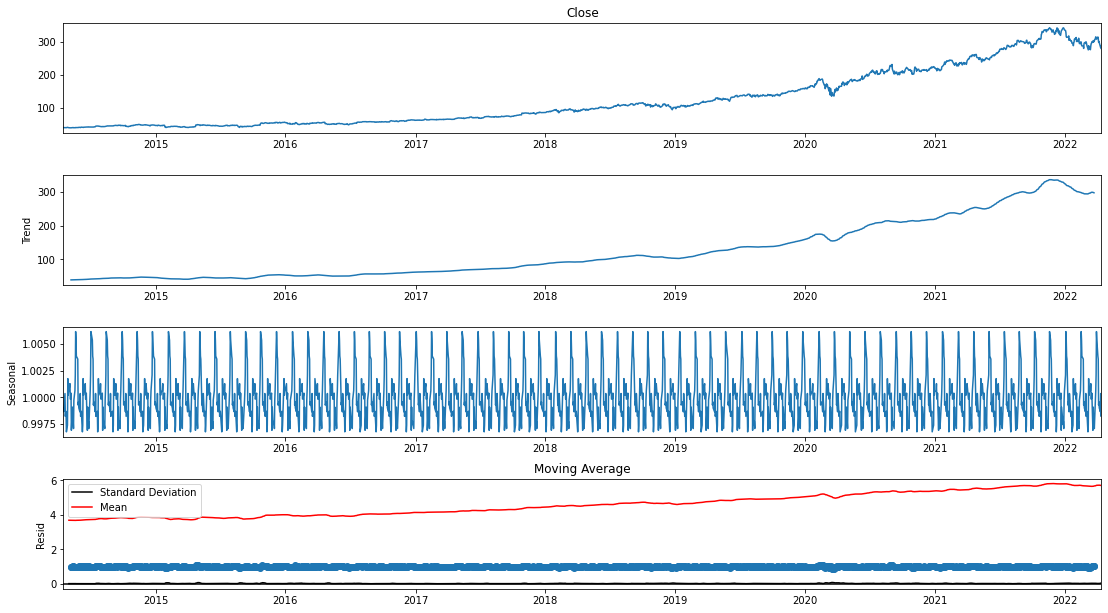

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9651.266, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9720.301, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9717.731, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9646.154, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9718.378, Time=0.82 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9718.352, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9716.322, Time=1.67 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-9711.777, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 4.180 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1810
Model:               SARIMAX(1, 1, 0)   Log Likelihood                4863.150
Date:                Sat, 16 Apr 2022   AIC                          -9720.301
Time:                       

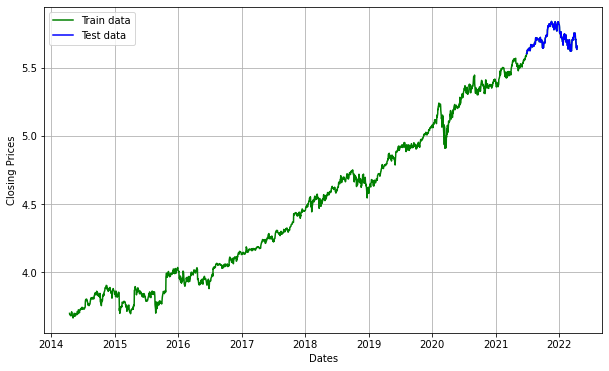

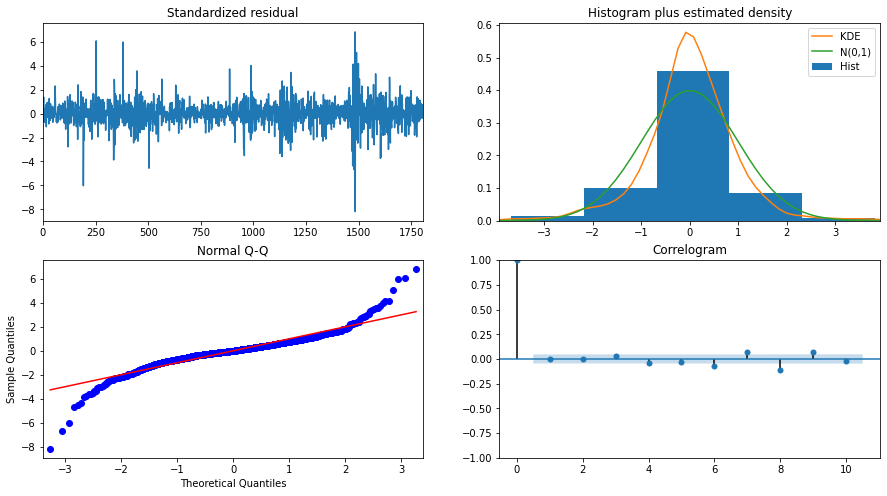

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1809
Model:                 ARIMA(1, 1, 0)   Log Likelihood                4863.150
Method:                       css-mle   S.D. of innovations              0.016
Date:                Sat, 16 Apr 2022   AIC                          -9720.301
Time:                        16:34:20   BIC                          -9703.799
Sample:                             1   HQIC                         -9714.211
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.000      3.255      0.001       0.000       0.002
ar.L1.D.Close    -0.1962      0.023     -8.512      0.000      -0.241      -0.151
                                    Root

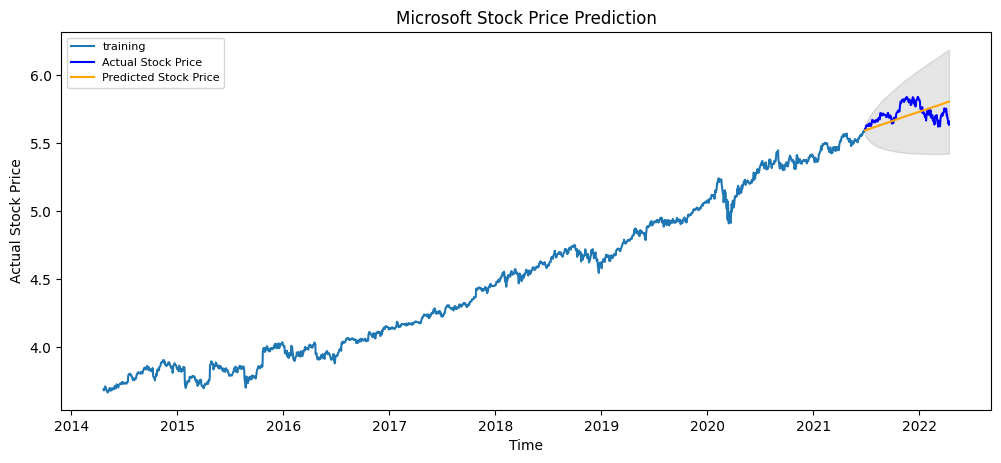

MSE: 0.005957783917992812
MAE: 0.06676933599905058
RMSE: 0.07718668225796994
MAPE: 0.011650108087730444


In [ ]:
def MSFT_ARIMA():
  MSFT = yf.download('MSFT',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  MSFT_df = pd.DataFrame(MSFT)
  MSFT_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for Microsoft')
  plt.plot(MSFT_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  MSFT_df_close = MSFT_df['Close']
  MSFT_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(MSFT_df_close)

  result = seasonal_decompose(MSFT_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  MSFT_df_log = np.log(MSFT_df_close)
  moving_avg = MSFT_df_log.rolling(12).mean()
  std_dev = MSFT_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = MSFT_df_log[3:int(len(MSFT_df_log)*0.9)], MSFT_df_log[int(len(MSFT_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(MSFT_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(1,1,0))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(202,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('Microsoft Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

MSFT_ARIMA()




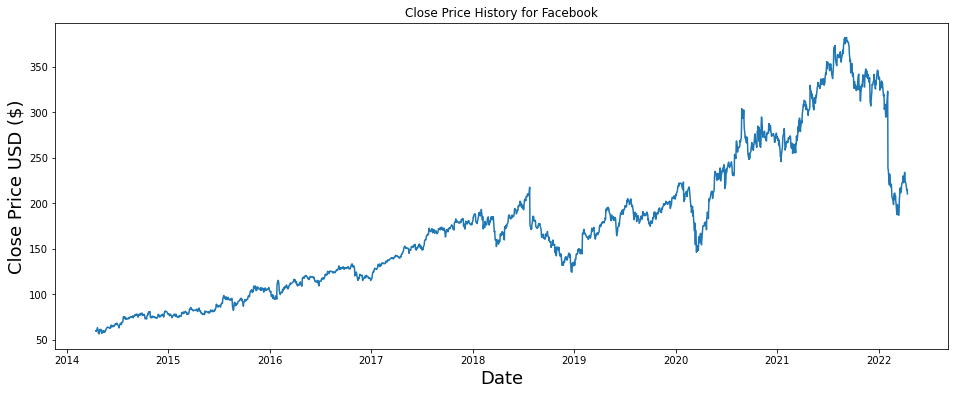

No handles with labels found to put in legend.


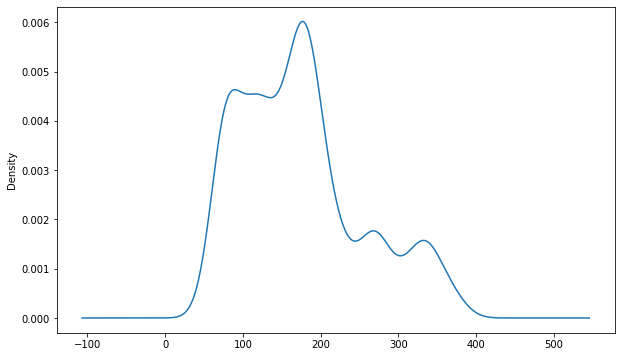

<Figure size 720x432 with 0 Axes>

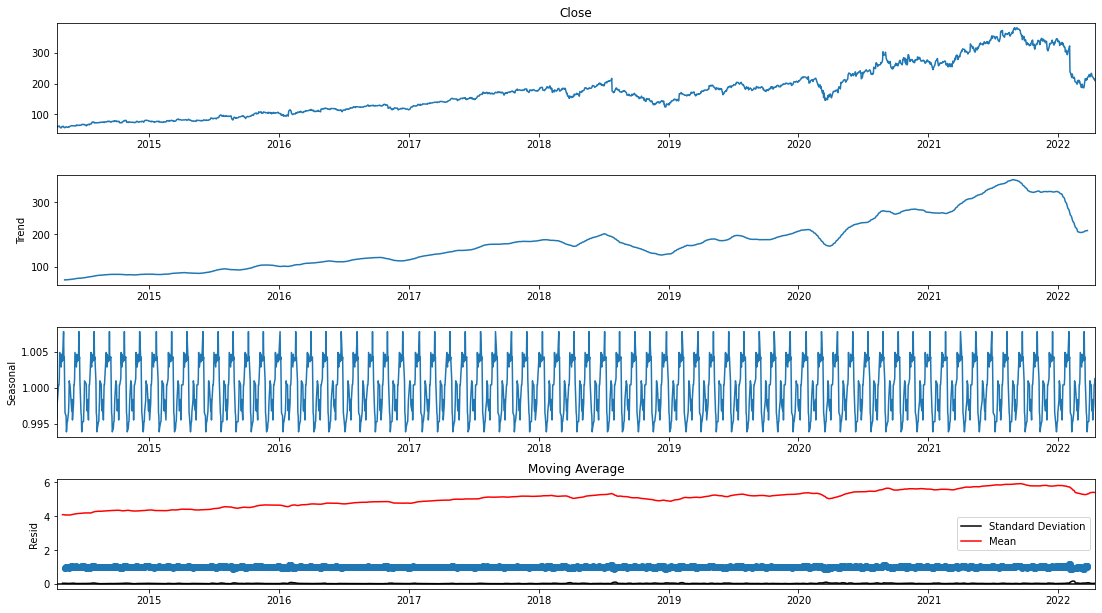

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9033.387, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9037.120, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9037.073, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9031.214, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9035.187, Time=2.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9035.832, Time=2.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9033.150, Time=2.63 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-9034.464, Time=0.25 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 9.061 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1810
Model:               SARIMAX(1, 1, 0)   Log Likelihood                4521.560
Date:                Sat, 16 Apr 2022   AIC                          -9037.120
Time:                       

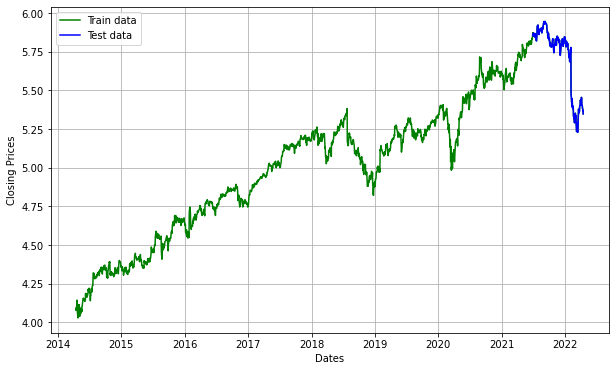

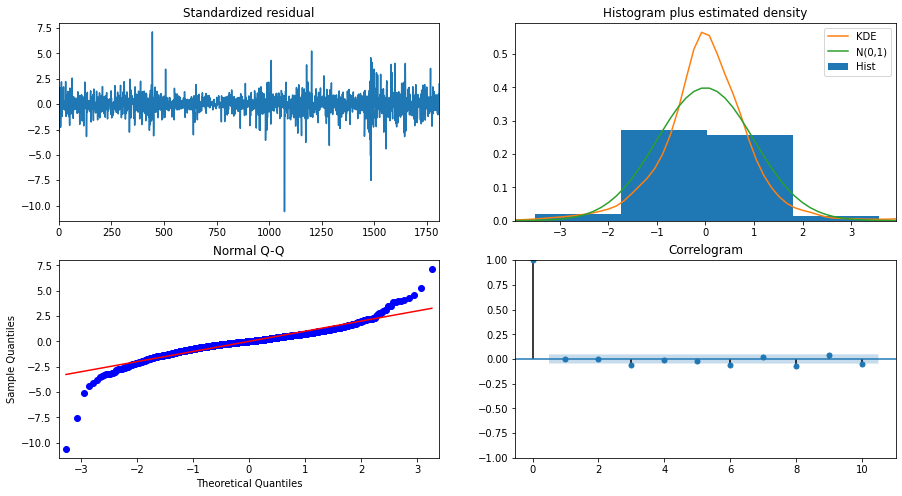

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1809
Model:                 ARIMA(1, 1, 0)   Log Likelihood                4521.560
Method:                       css-mle   S.D. of innovations              0.020
Date:                Sat, 16 Apr 2022   AIC                          -9037.120
Time:                        16:34:36   BIC                          -9020.619
Sample:                             1   HQIC                         -9031.030
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.000      2.162      0.031    8.92e-05       0.002
ar.L1.D.Close    -0.0563      0.024     -2.396      0.017      -0.102      -0.010
                                    Root

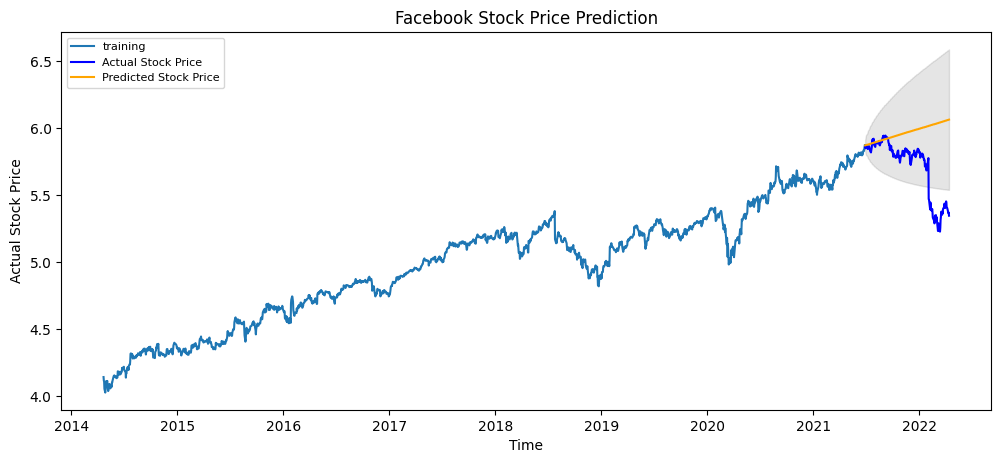

MSE: 0.13078326455207742
MAE: 0.25457560573854454
RMSE: 0.36163968885076403
MAPE: 0.04631249185960617


In [ ]:
def FB_ARIMA():
  FB = yf.download('FB',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  FB_df = pd.DataFrame(FB)
  FB_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for Facebook')
  plt.plot(FB_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  FB_df_close = FB_df['Close']
  FB_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(FB_df_close)

  result = seasonal_decompose(FB_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  FB_df_log = np.log(FB_df_close)
  moving_avg = FB_df_log.rolling(12).mean()
  std_dev = FB_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = FB_df_log[3:int(len(FB_df_log)*0.9)], FB_df_log[int(len(FB_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(FB_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(1,1,0))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(202,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('Facebook Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

FB_ARIMA()




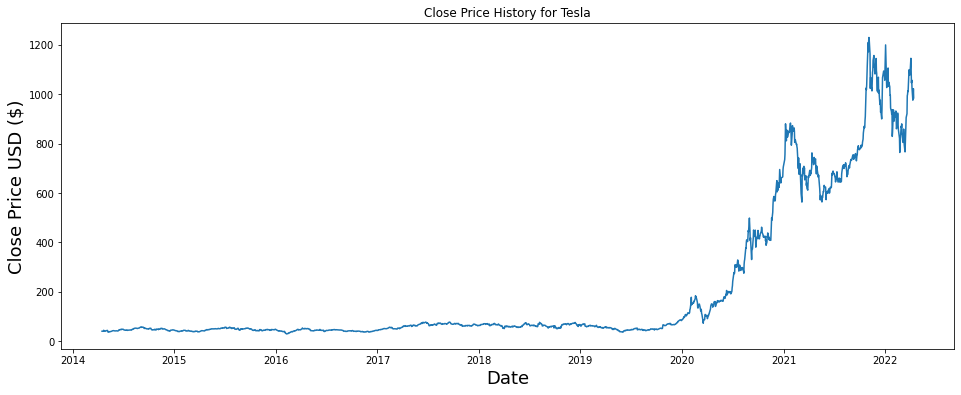

No handles with labels found to put in legend.


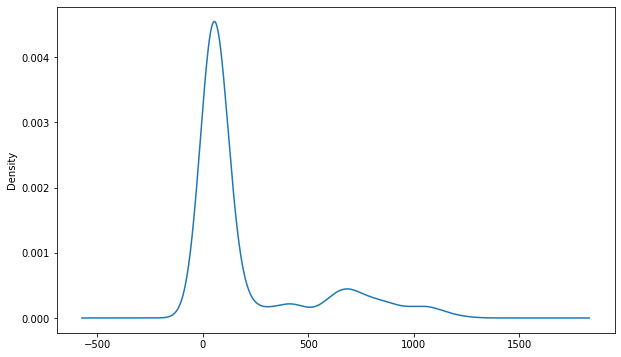

<Figure size 720x432 with 0 Axes>

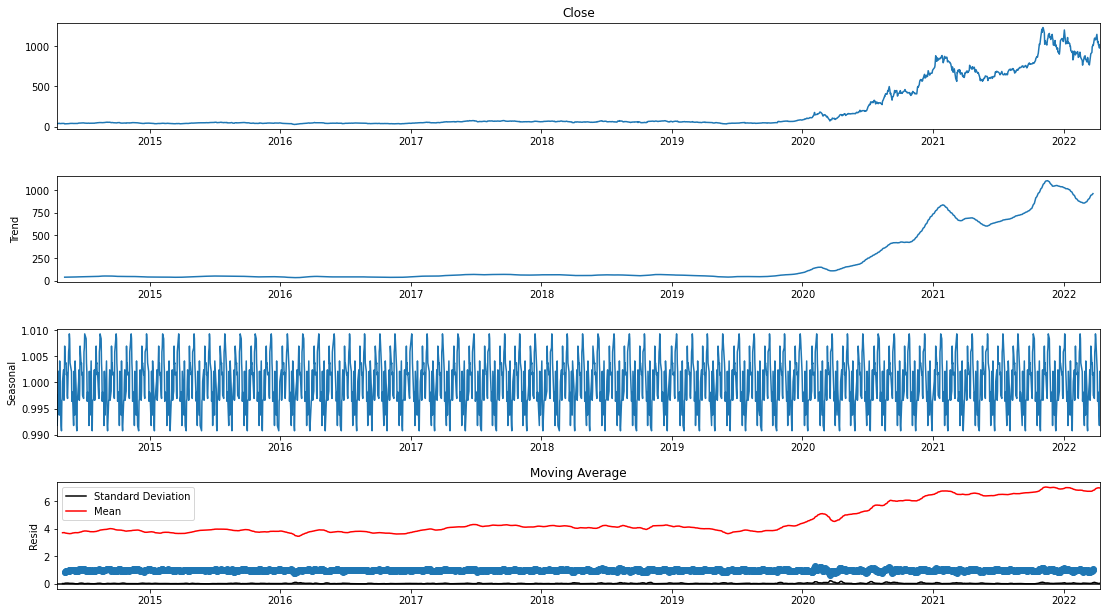

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7073.593, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7071.608, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7071.600, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7072.007, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7068.802, Time=1.62 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.064 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1810
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3538.797
Date:                Sat, 16 Apr 2022   AIC                          -7073.593
Time:                        16:43:30   BIC                          -7062.592
Sample:                             0   HQIC                         -7069.533
                               - 1810                                  

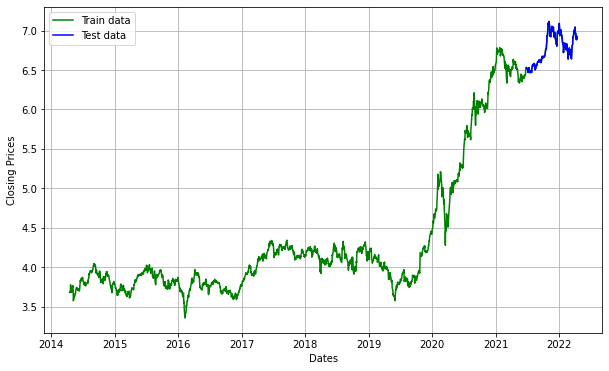

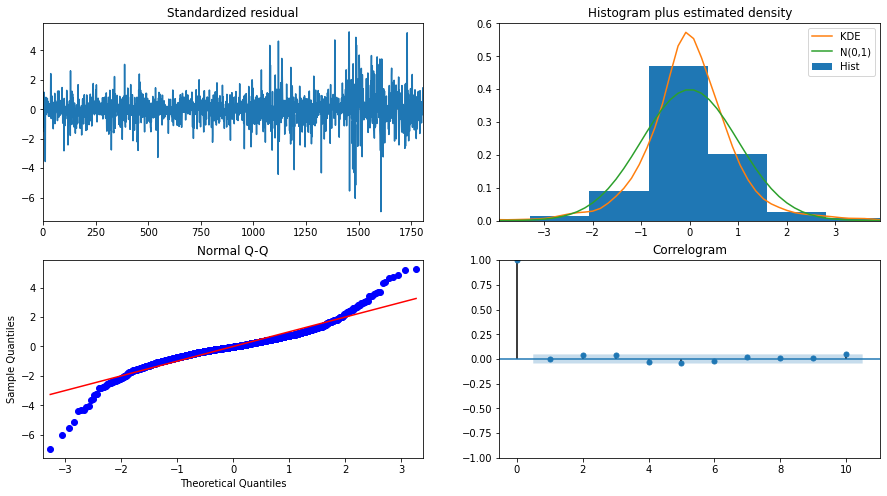

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1809
Model:                 ARIMA(0, 1, 0)   Log Likelihood                3538.797
Method:                           css   S.D. of innovations              0.034
Date:                Sat, 16 Apr 2022   AIC                          -7073.593
Time:                        16:43:31   BIC                          -7062.592
Sample:                             1   HQIC                         -7069.533
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.001      1.895      0.058   -5.26e-05       0.003


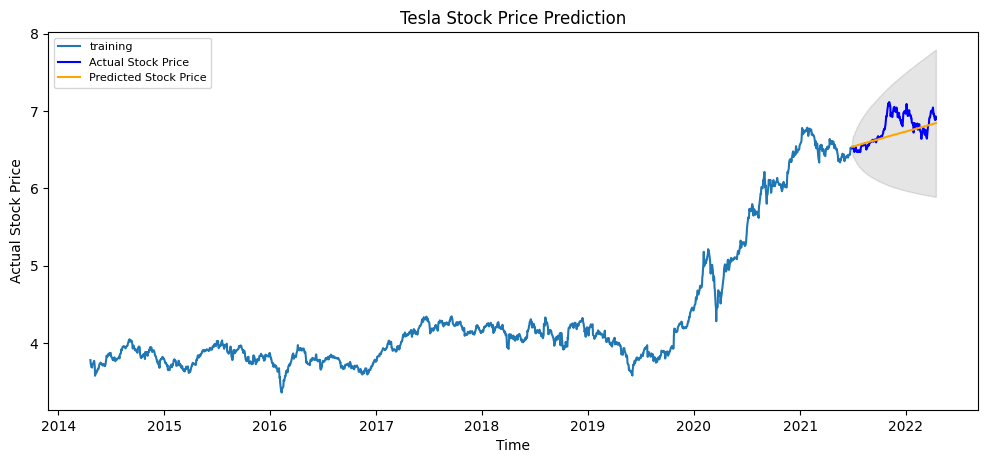

MSE: 0.02664277680859127
MAE: 0.1191090536596281
RMSE: 0.1632261523426662
MAPE: 0.01725364006217388


In [ ]:
def TSLA_ARIMA():
  TSLA = yf.download('TSLA',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  TSLA_df = pd.DataFrame(TSLA)
  TSLA_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for Tesla')
  plt.plot(TSLA_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  TSLA_df_close = TSLA_df['Close']
  TSLA_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(TSLA_df_close)

  result = seasonal_decompose(TSLA_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  TSLA_df_log = np.log(TSLA_df_close)
  moving_avg = TSLA_df_log.rolling(12).mean()
  std_dev = TSLA_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = TSLA_df_log[3:int(len(TSLA_df_log)*0.9)], TSLA_df_log[int(len(TSLA_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(TSLA_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(0,1,0))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(202,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('Tesla Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

TSLA_ARIMA()




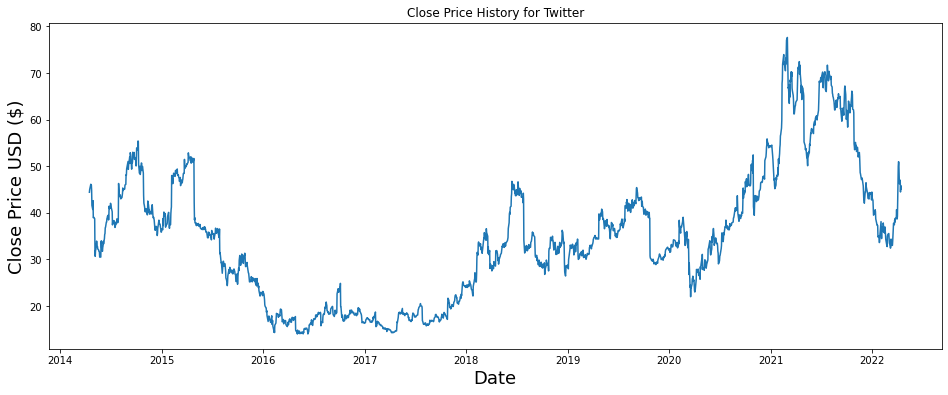

No handles with labels found to put in legend.


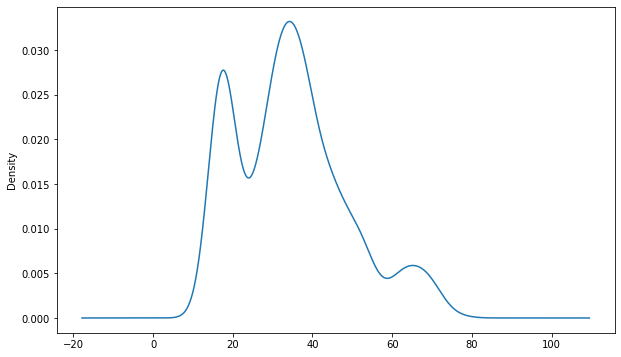

<Figure size 720x432 with 0 Axes>

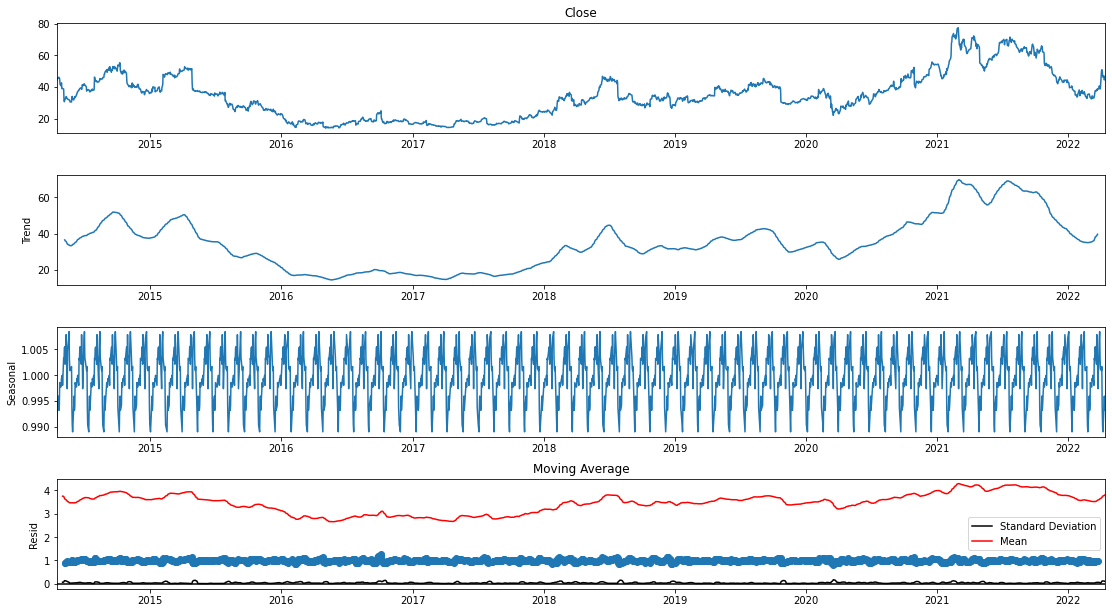

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7122.900, Time=0.68 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7122.495, Time=0.78 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7122.304, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7124.824, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7125.816, Time=3.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7125.819, Time=1.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-7127.805, Time=0.85 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-7125.812, Time=1.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-7123.810, Time=1.30 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-7129.735, Time=1.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-7124.415, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-7127.742, Time=0.81 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-7127.748, Time=0.66 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-7127.737, Time=1.10 sec
 ARIMA(3,1,1)(0,0,0

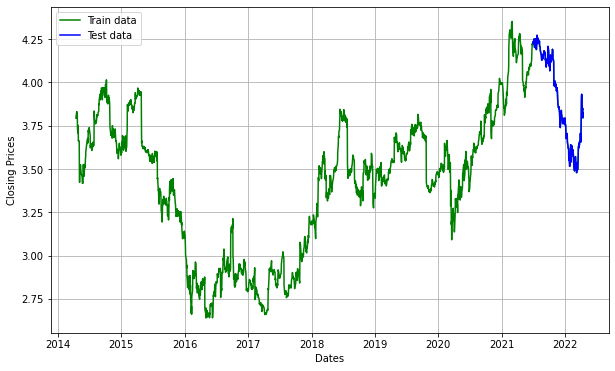

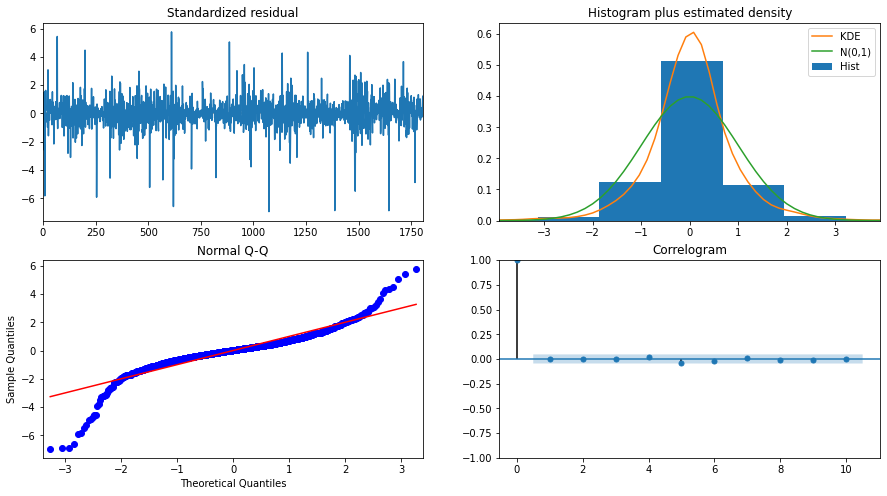

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1809
Model:                 ARIMA(0, 1, 0)   Log Likelihood                3563.450
Method:                           css   S.D. of innovations              0.034
Date:                Sat, 16 Apr 2022   AIC                          -7122.900
Time:                        16:46:40   BIC                          -7111.899
Sample:                             1   HQIC                         -7118.840
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.275      0.783      -0.001       0.002


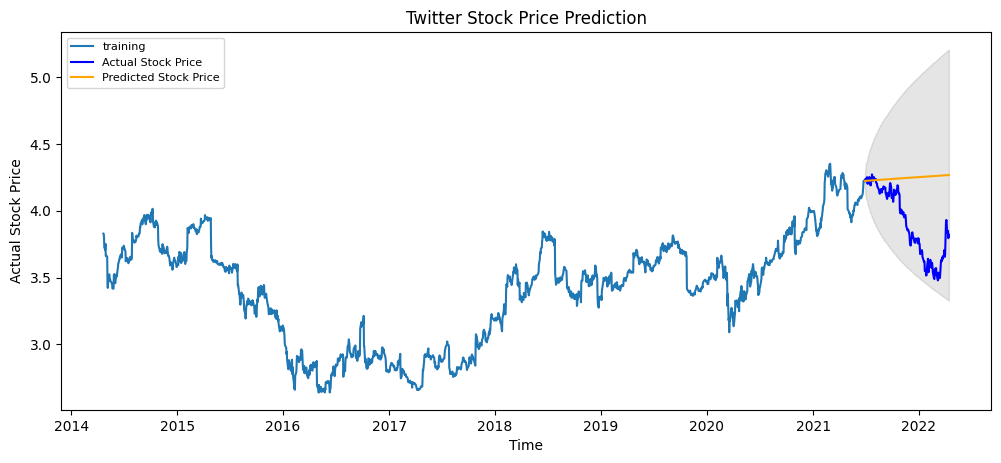

MSE: 0.18383367854862434
MAE: 0.33927561142700724
RMSE: 0.4287582985186693
MAPE: 0.0915853519103586


In [ ]:
def TWTR_ARIMA():
  TWTR = yf.download('TWTR',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  TWTR_df = pd.DataFrame(TWTR)
  TWTR_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for Twitter')
  plt.plot(TWTR_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  TWTR_df_close = TWTR_df['Close']
  TWTR_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(TWTR_df_close)

  result = seasonal_decompose(TWTR_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  TWTR_df_log = np.log(TWTR_df_close)
  moving_avg = TWTR_df_log.rolling(12).mean()
  std_dev = TWTR_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = TWTR_df_log[3:int(len(TWTR_df_log)*0.9)], TWTR_df_log[int(len(TWTR_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(TWTR_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(0,1,0))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(202,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('Twitter Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

TWTR_ARIMA()




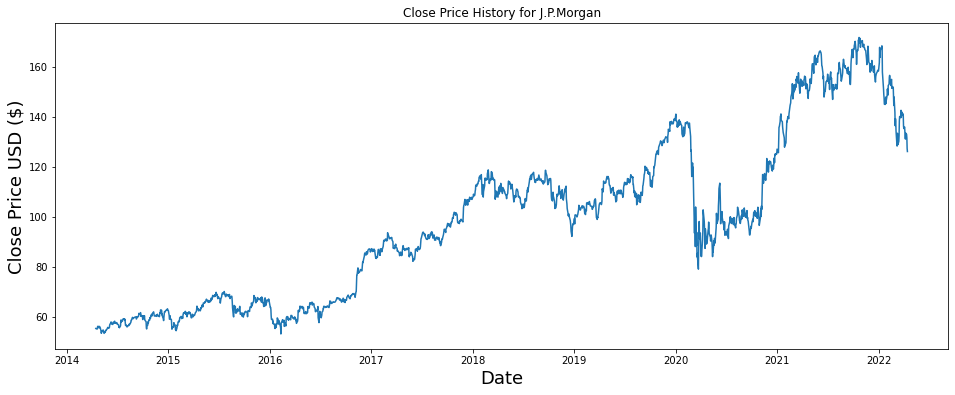

No handles with labels found to put in legend.


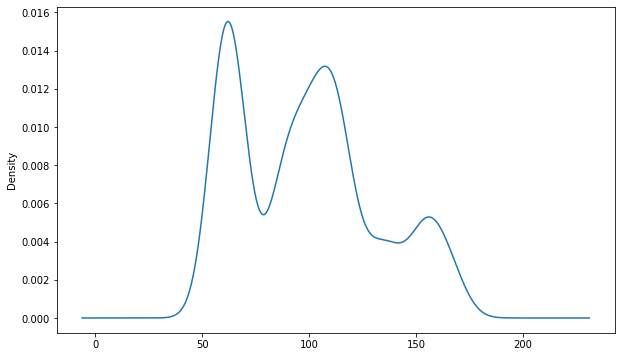

<Figure size 720x432 with 0 Axes>

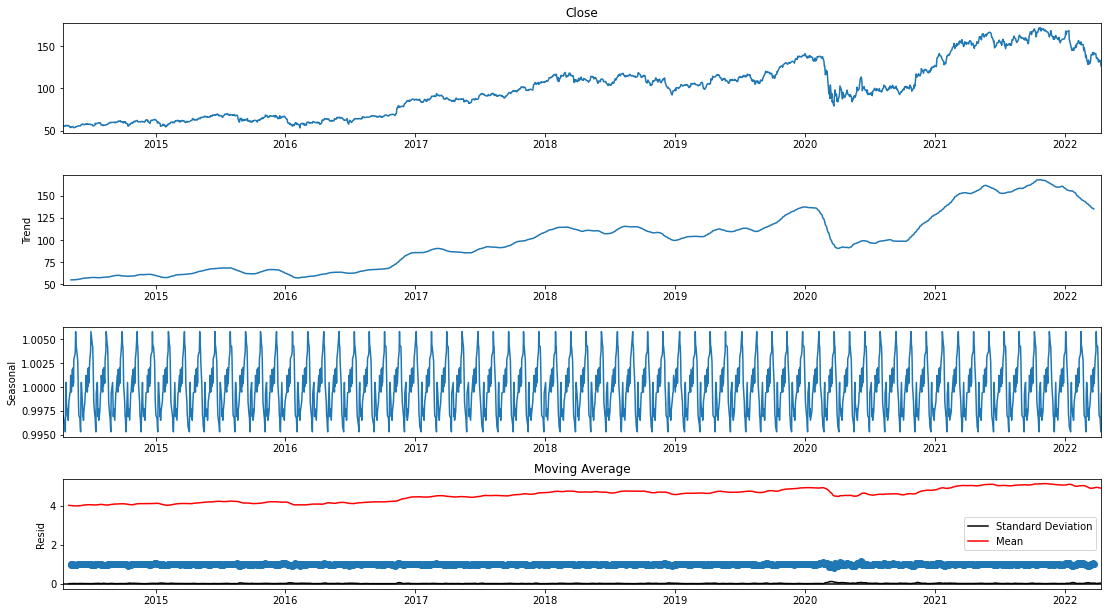

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9483.898, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9517.495, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9512.227, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9484.047, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9526.245, Time=1.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-9524.266, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9524.203, Time=1.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9518.276, Time=1.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-9522.266, Time=1.58 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-9526.147, Time=0.59 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 8.125 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1810
Model:               SARIMAX(2, 1, 0)   Log Likeliho

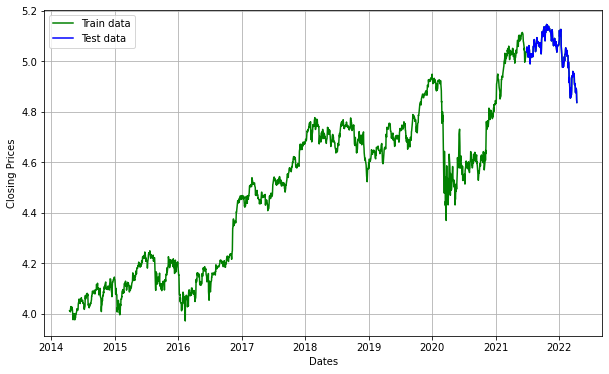

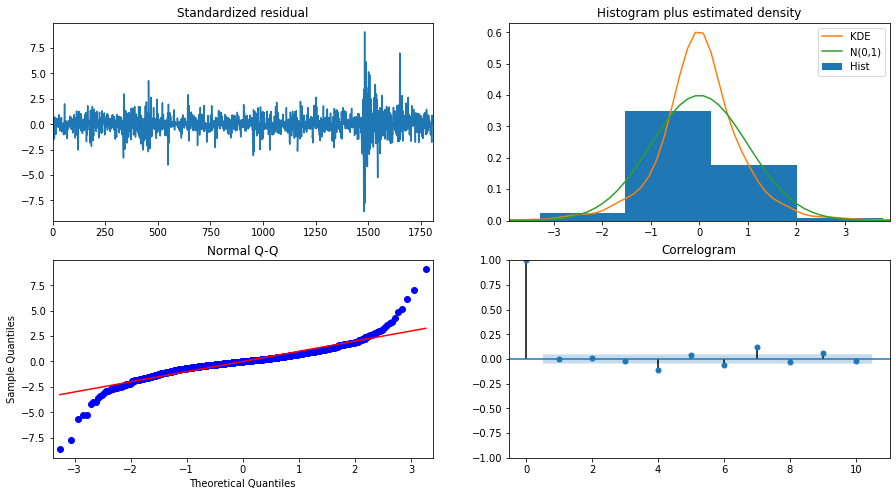

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1809
Model:                 ARIMA(2, 1, 0)   Log Likelihood                4767.123
Method:                       css-mle   S.D. of innovations              0.017
Date:                Sat, 16 Apr 2022   AIC                          -9526.246
Time:                        16:56:31   BIC                          -9504.244
Sample:                             1   HQIC                         -9518.126
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.000      1.451      0.147      -0.000       0.001
ar.L1.D.Close    -0.1288      0.023     -5.496      0.000      -0.175      -0.083
ar.L2.D.Close     0.0769      0.023     

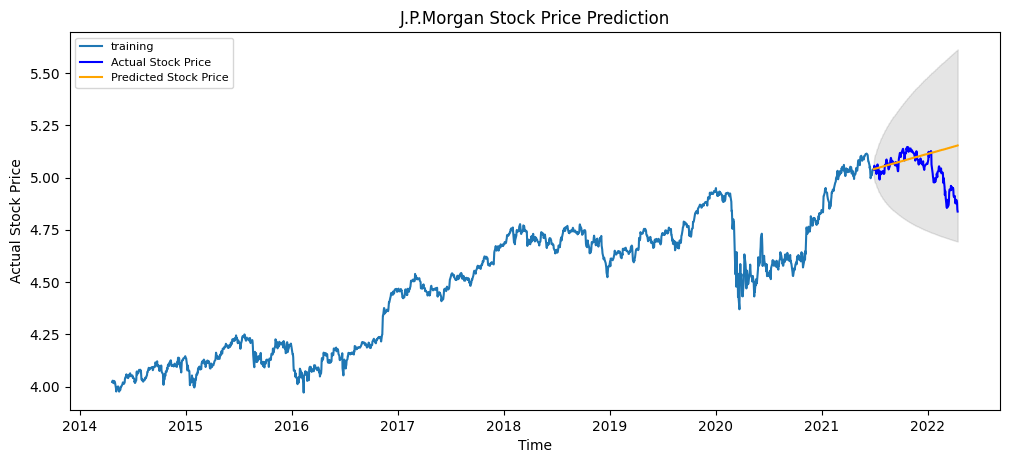

MSE: 0.012158146346427118
MAE: 0.07356175541196439
RMSE: 0.11026398481112097
MAPE: 0.014806473966955256


In [ ]:
def JPM_ARIMA():
  JPM = yf.download('JPM',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  JPM_df = pd.DataFrame(JPM)
  JPM_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for J.P.Morgan')
  plt.plot(JPM_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  JPM_df_close = JPM_df['Close']
  JPM_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(JPM_df_close)

  result = seasonal_decompose(JPM_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  JPM_df_log = np.log(JPM_df_close)
  moving_avg = JPM_df_log.rolling(12).mean()
  std_dev = JPM_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = JPM_df_log[3:int(len(JPM_df_log)*0.9)], JPM_df_log[int(len(JPM_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(JPM_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(2,1,0))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(202,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('J.P.Morgan Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

JPM_ARIMA()




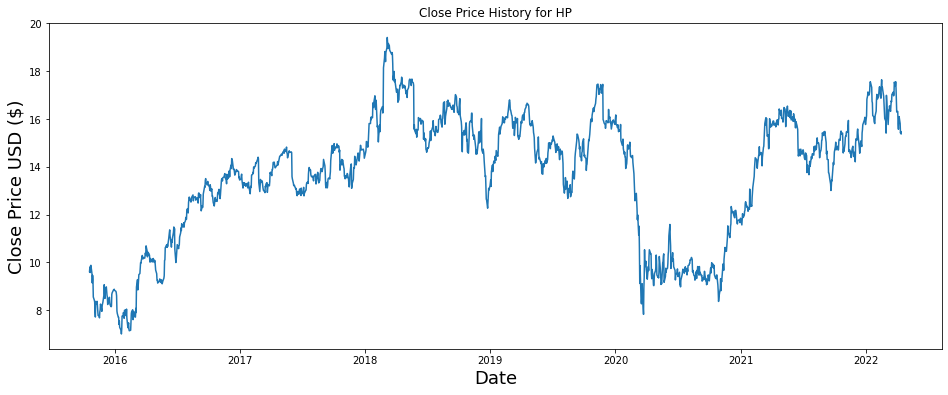

No handles with labels found to put in legend.


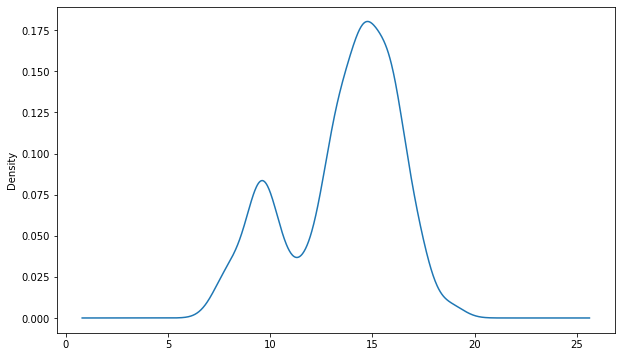

<Figure size 720x432 with 0 Axes>

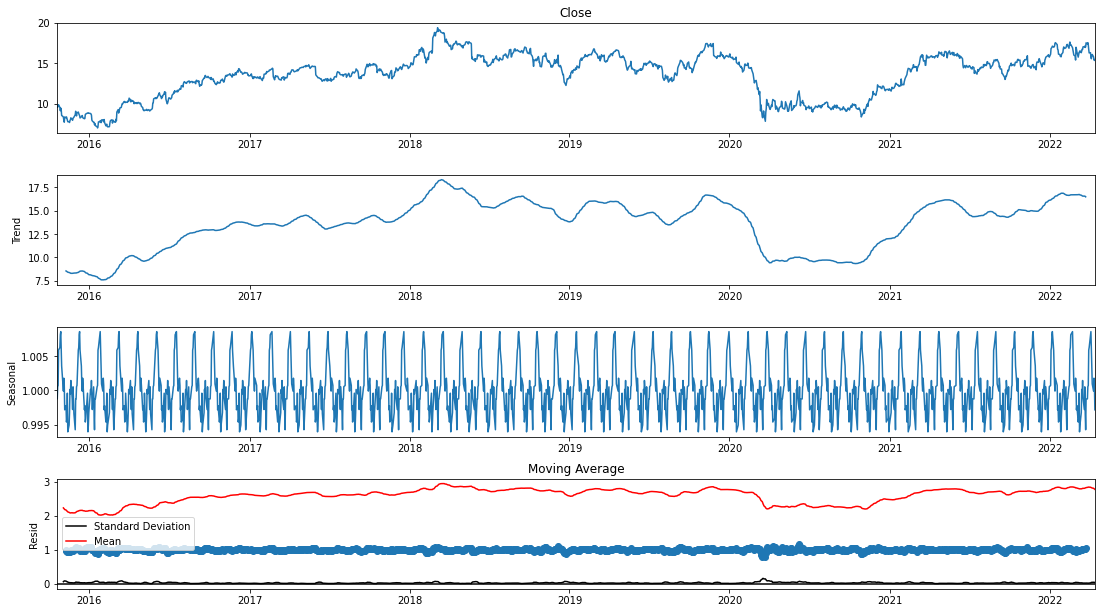

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6928.113, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6927.823, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6927.803, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6929.911, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6925.827, Time=0.50 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.498 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1468
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3465.956
Date:                Sat, 16 Apr 2022   AIC                          -6929.911
Time:                        16:59:56   BIC                          -6924.620
Sample:                             0   HQIC                         -6927.938
                               - 1468                                  

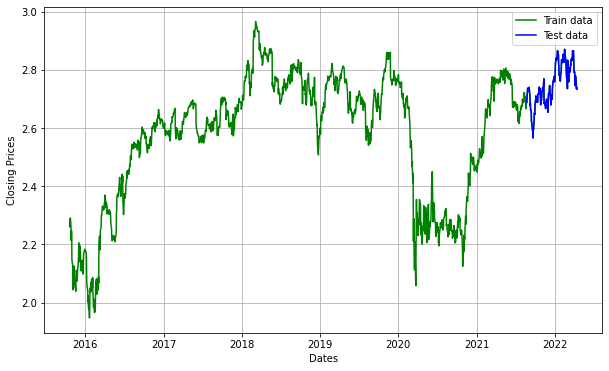

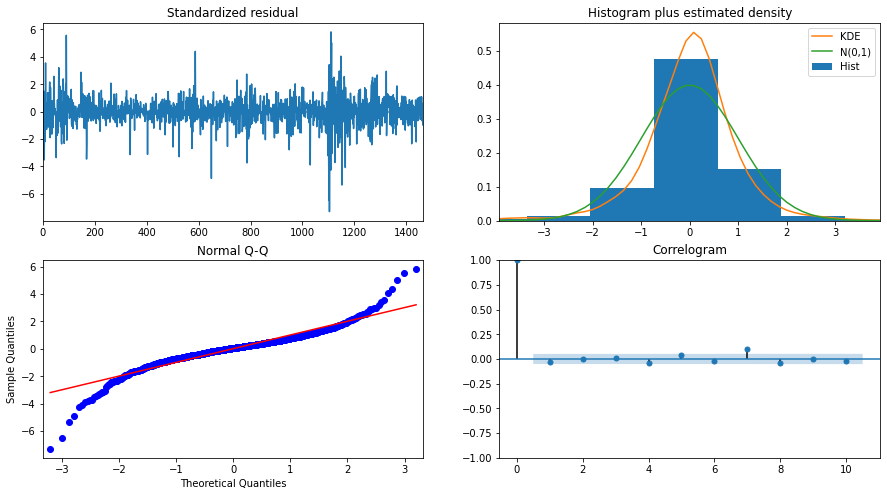

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1467
Model:                 ARIMA(0, 1, 0)   Log Likelihood                3466.057
Method:                           css   S.D. of innovations              0.023
Date:                Sat, 16 Apr 2022   AIC                          -6928.113
Time:                        16:59:57   BIC                          -6917.531
Sample:                             1   HQIC                         -6924.167
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.449      0.653      -0.001       0.001


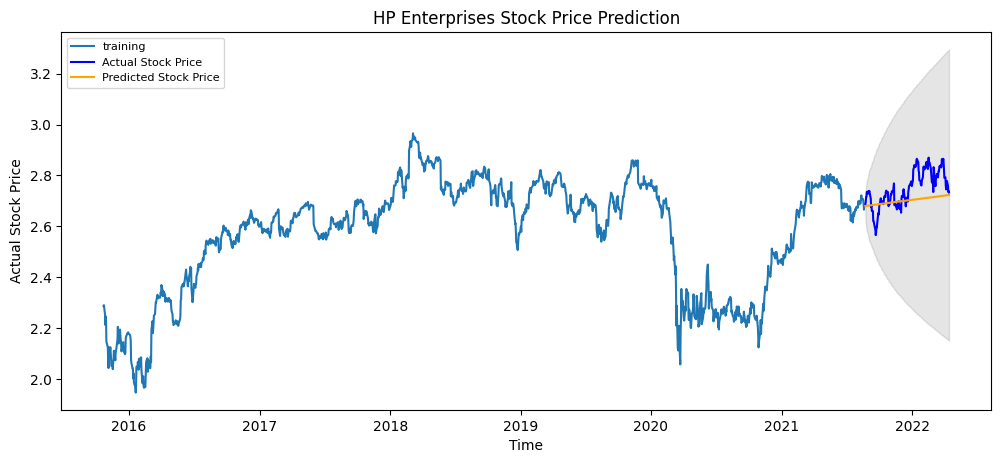

MSE: 0.005796042557073267
MAE: 0.061492651474813316
RMSE: 0.07613174473945325
MAPE: 0.022107266209820477


In [ ]:
def HPE_ARIMA():
  HPE = yf.download('HPE',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  HPE_df = pd.DataFrame(HPE)
  HPE_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for HP')
  plt.plot(HPE_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  HPE_df_close = HPE_df['Close']
  HPE_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(HPE_df_close)

  result = seasonal_decompose(HPE_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  HPE_df_log = np.log(HPE_df_close)
  moving_avg = HPE_df_log.rolling(12).mean()
  std_dev = HPE_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = HPE_df_log[3:int(len(HPE_df_log)*0.9)], HPE_df_log[int(len(HPE_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(HPE_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(0,1,0))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(164,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('HP Enterprises Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

HPE_ARIMA()




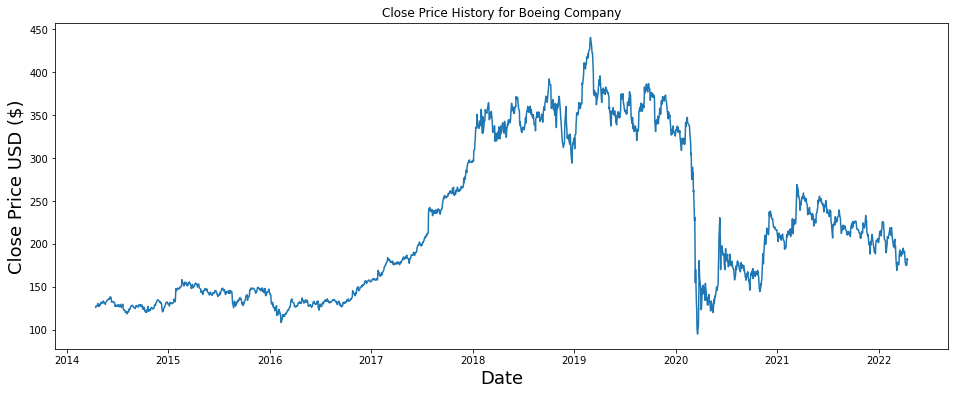

No handles with labels found to put in legend.


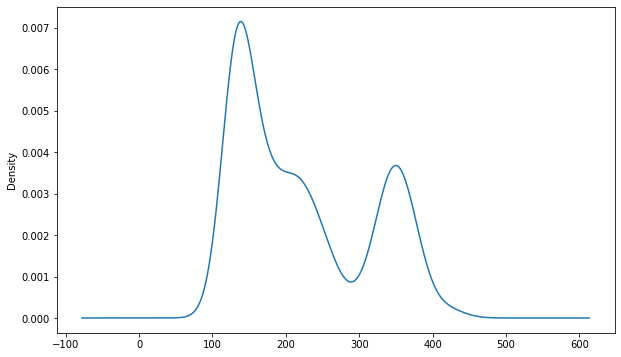

<Figure size 720x432 with 0 Axes>

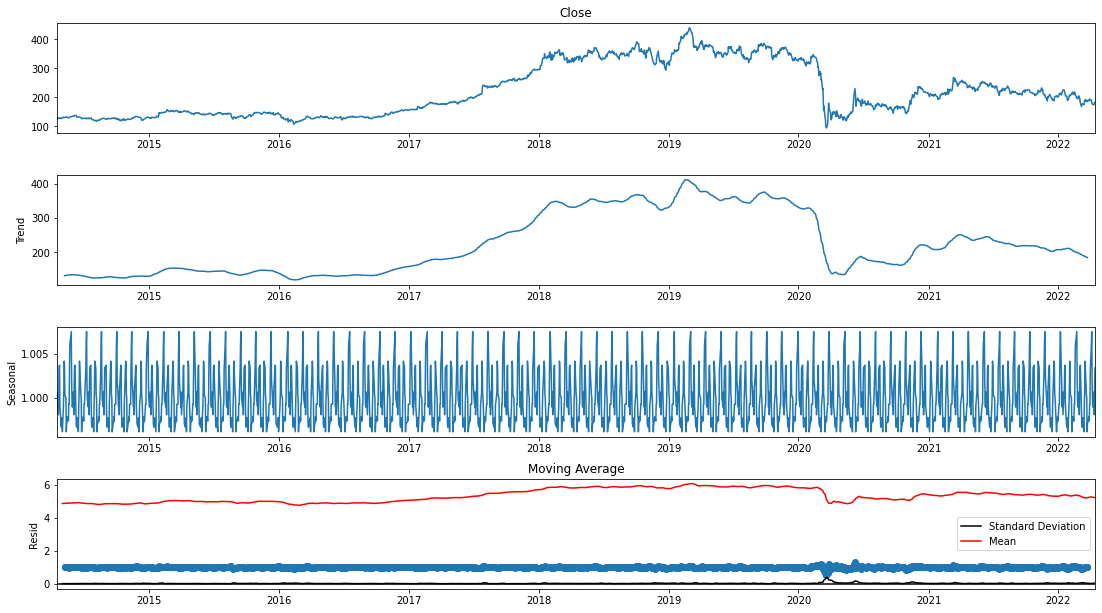

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8132.608, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8141.324, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8139.228, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8134.269, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-8164.326, Time=0.90 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-8164.991, Time=2.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-8162.806, Time=2.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8163.922, Time=3.06 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-8166.746, Time=0.79 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-8166.100, Time=1.12 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-8164.555, Time=0.81 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-8164.684, Time=0.25 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 14.321 seconds
                               SARIMAX Results                             

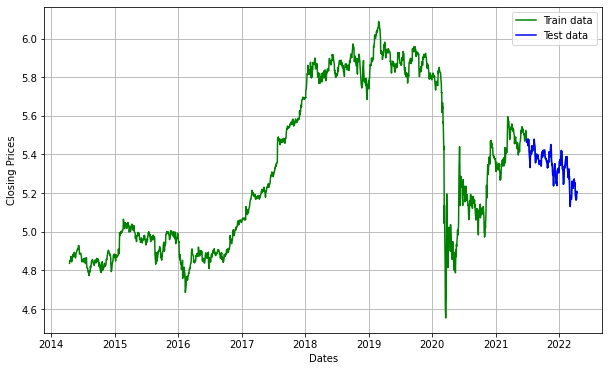

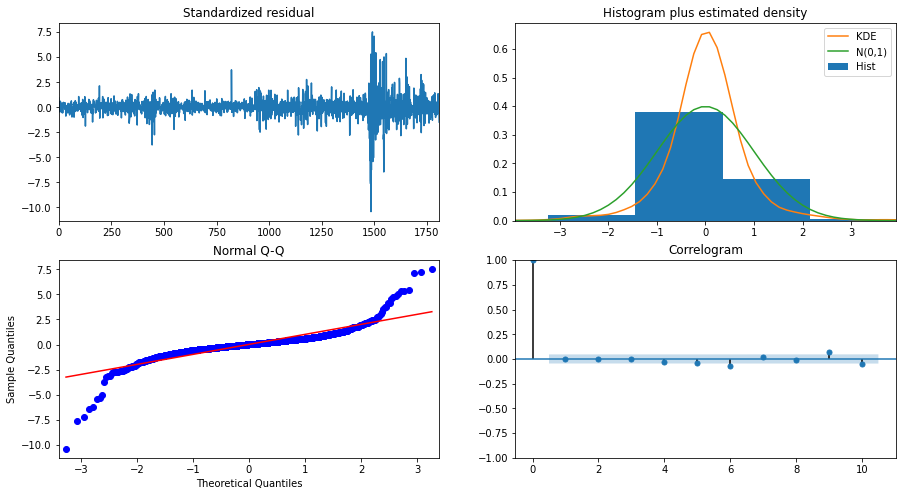

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1809
Model:                 ARIMA(3, 1, 0)   Log Likelihood                4087.495
Method:                       css-mle   S.D. of innovations              0.025
Date:                Sat, 16 Apr 2022   AIC                          -8164.991
Time:                        17:07:48   BIC                          -8137.488
Sample:                             1   HQIC                         -8154.841
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.001      0.494      0.621      -0.001       0.002
ar.L1.D.Close     0.0724      0.024      3.081      0.002       0.026       0.119
ar.L2.D.Close     0.1198      0.023     

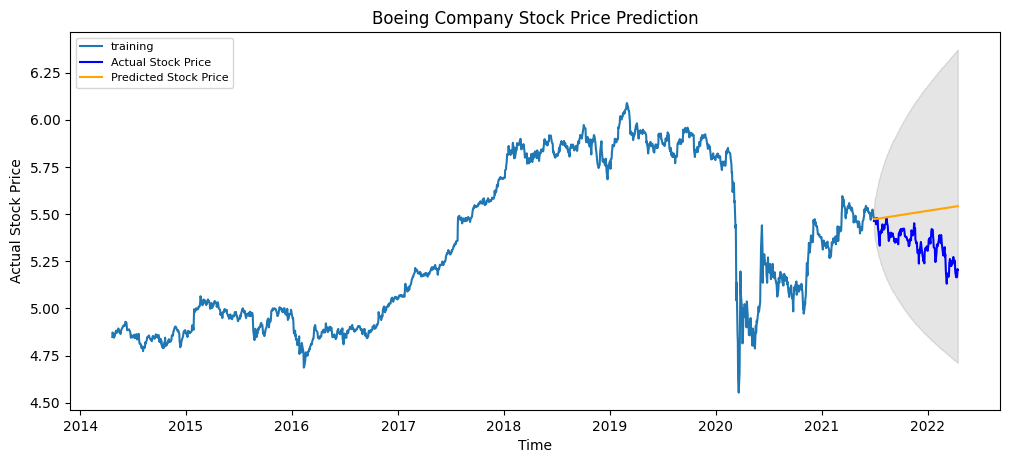

MSE: 0.03467218923948031
MAE: 0.16069874835428916
RMSE: 0.18620469714666252
MAPE: 0.0303170822511665


In [ ]:
def BA_ARIMA():
  BA = yf.download('BA',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  BA_df = pd.DataFrame(BA)
  BA_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for Boeing Company')
  plt.plot(BA_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  BA_df_close = BA_df['Close']
  BA_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(BA_df_close)

  result = seasonal_decompose(BA_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  BA_df_log = np.log(BA_df_close)
  moving_avg = BA_df_log.rolling(12).mean()
  std_dev = BA_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = BA_df_log[3:int(len(BA_df_log)*0.9)], BA_df_log[int(len(BA_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(BA_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(3,1,0))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(202,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('Boeing Company Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

BA_ARIMA()




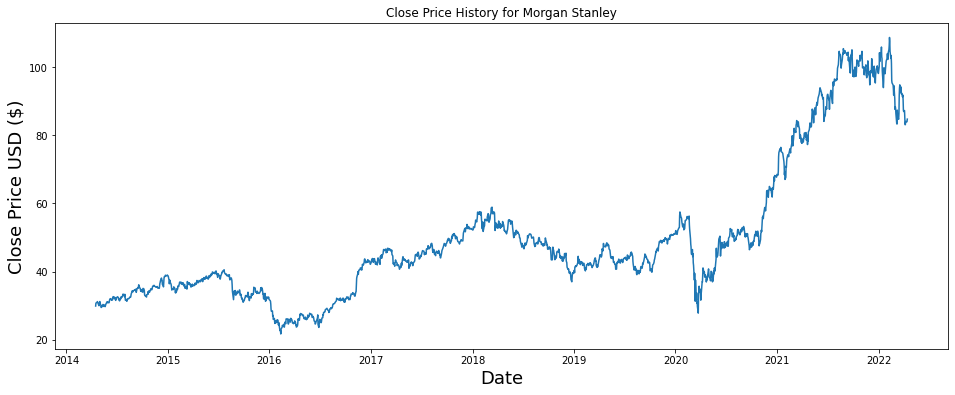

No handles with labels found to put in legend.


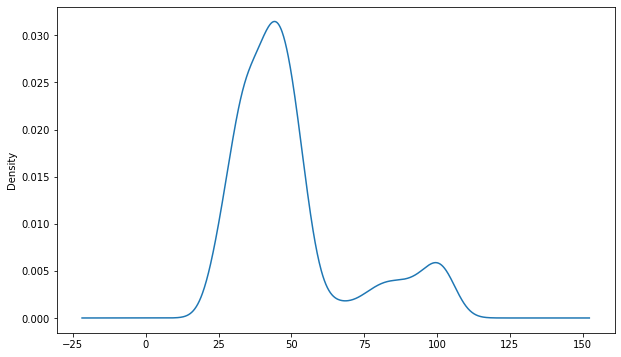

<Figure size 720x432 with 0 Axes>

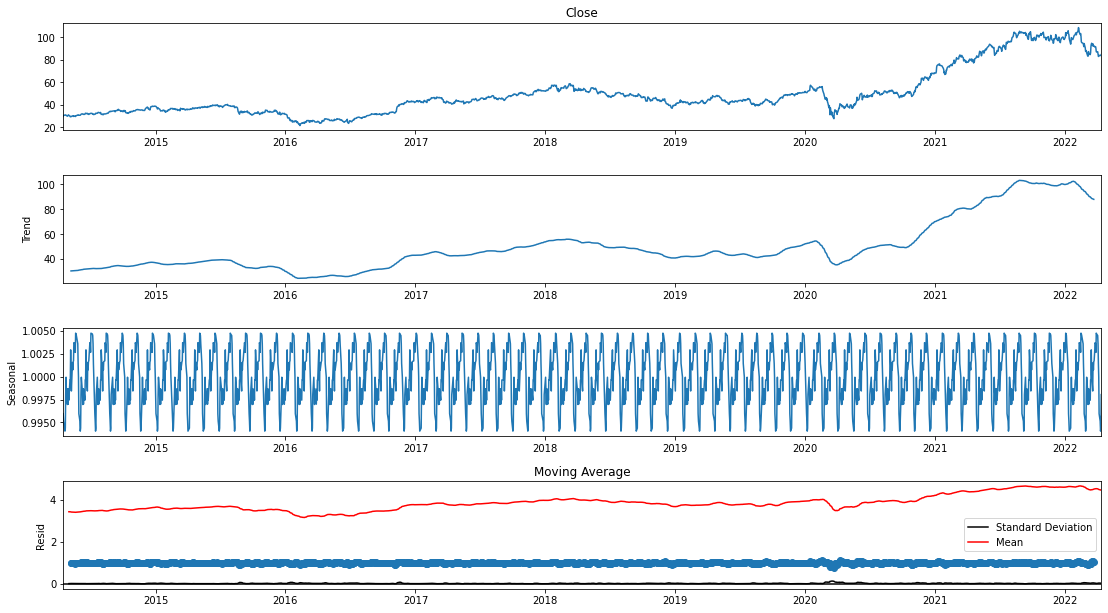

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8990.462, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9013.375, Time=0.70 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9009.630, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8991.007, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9022.502, Time=0.87 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-9020.655, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9020.479, Time=1.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9016.444, Time=0.70 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-9018.575, Time=0.97 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-9022.928, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-9013.531, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-9021.111, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-9020.904, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-9016.663, Time=0.34 sec
 ARIMA(3,1,1)(0,0,0

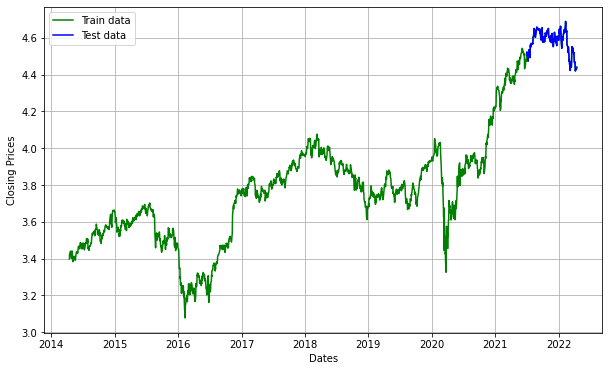

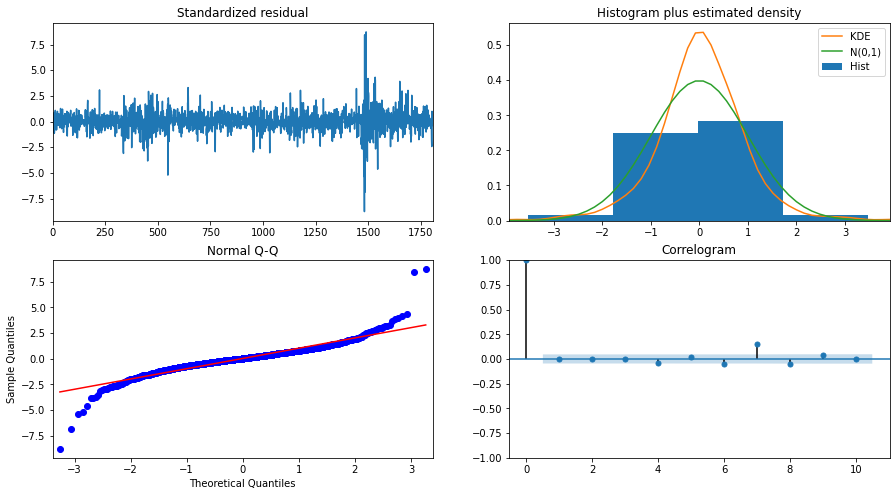

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1809
Model:                 ARIMA(2, 1, 0)   Log Likelihood                4515.251
Method:                       css-mle   S.D. of innovations              0.020
Date:                Sat, 16 Apr 2022   AIC                          -9022.502
Time:                        17:07:27   BIC                          -9000.500
Sample:                             1   HQIC                         -9014.382
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.000      1.256      0.209      -0.000       0.001
ar.L1.D.Close    -0.1078      0.023     -4.599      0.000      -0.154      -0.062
ar.L2.D.Close     0.0783      0.023     

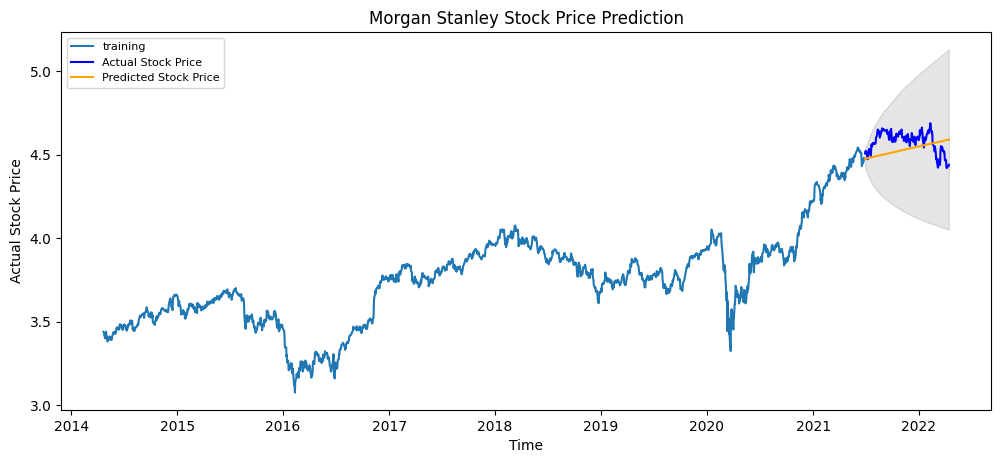

MSE: 0.008584657780448937
MAE: 0.0834462358383872
RMSE: 0.09265342832539407
MAPE: 0.018214914365767127


In [ ]:
def MS_ARIMA():
  MS = yf.download('MS',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  MS_df = pd.DataFrame(MS)
  MS_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for Morgan Stanley')
  plt.plot(MS_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  MS_df_close = MS_df['Close']
  MS_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(MS_df_close)

  result = seasonal_decompose(MS_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  MS_df_log = np.log(MS_df_close)
  moving_avg = MS_df_log.rolling(12).mean()
  std_dev = MS_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = MS_df_log[3:int(len(MS_df_log)*0.9)], MS_df_log[int(len(MS_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(MS_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(2,1,0))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(202,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('Morgan Stanley Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

MS_ARIMA()




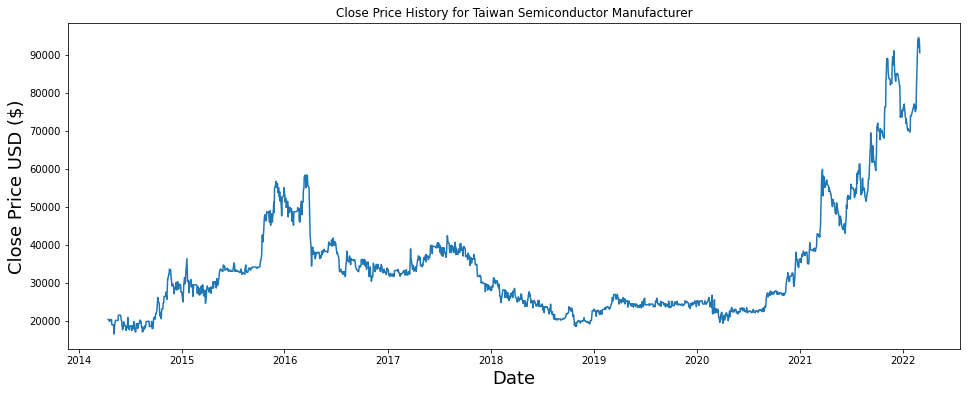

No handles with labels found to put in legend.


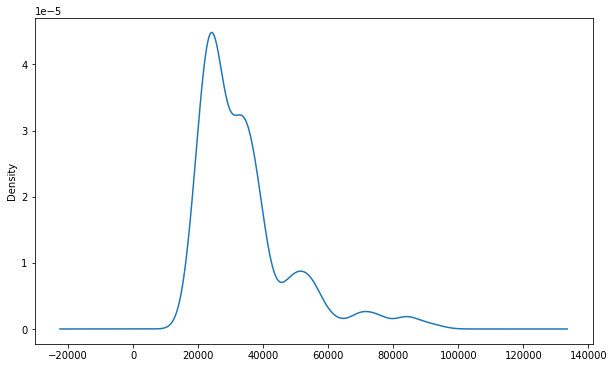

<Figure size 720x432 with 0 Axes>

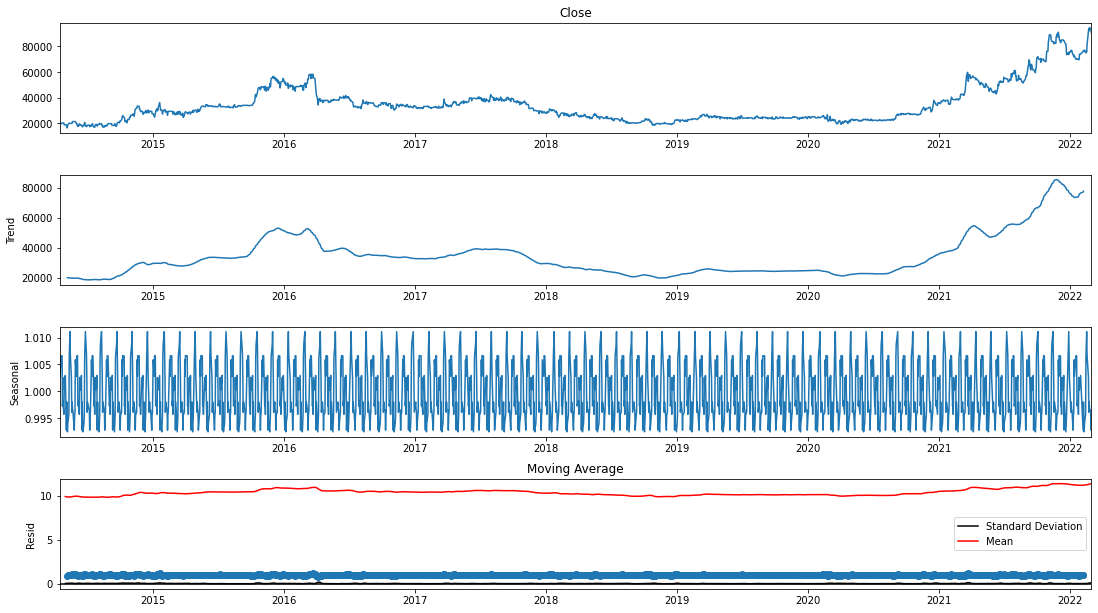

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7365.329, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7388.123, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7389.545, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7366.793, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7389.410, Time=1.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7388.654, Time=1.56 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7387.750, Time=1.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-7390.830, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-7390.630, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-7389.912, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-7389.448, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-7393.339, Time=1.38 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-7394.637, Time=2.33 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-7393.522, Time=2.31 sec
 ARIMA(3,1,2)(0,0,0

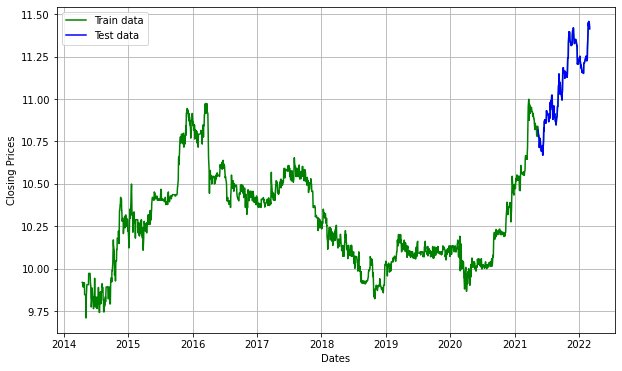

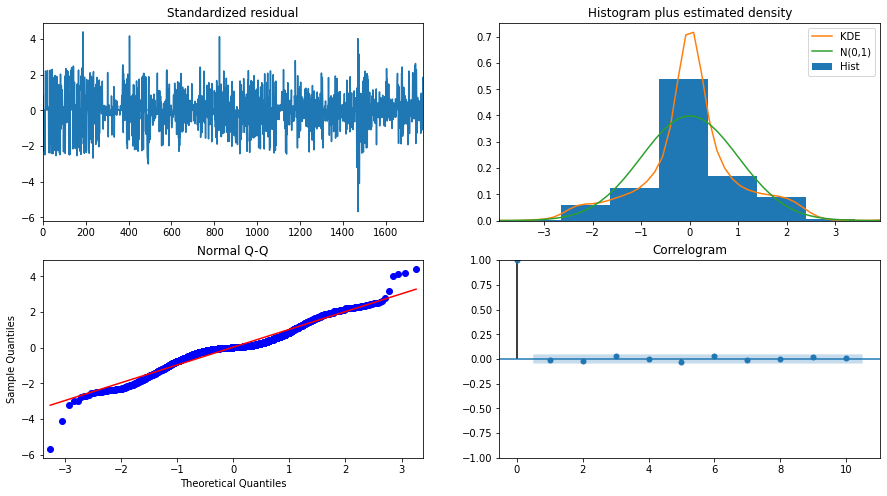

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1777
Model:                 ARIMA(2, 1, 2)   Log Likelihood                3703.799
Method:                       css-mle   S.D. of innovations              0.030
Date:                Sat, 16 Apr 2022   AIC                          -7395.598
Time:                        17:12:47   BIC                          -7362.702
Sample:                             1   HQIC                         -7383.447
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.001      1.009      0.313      -0.000       0.002
ar.L1.D.Close    -0.2137      0.158     -1.357      0.175      -0.522       0.095
ar.L2.D.Close     0.6046      0.117     

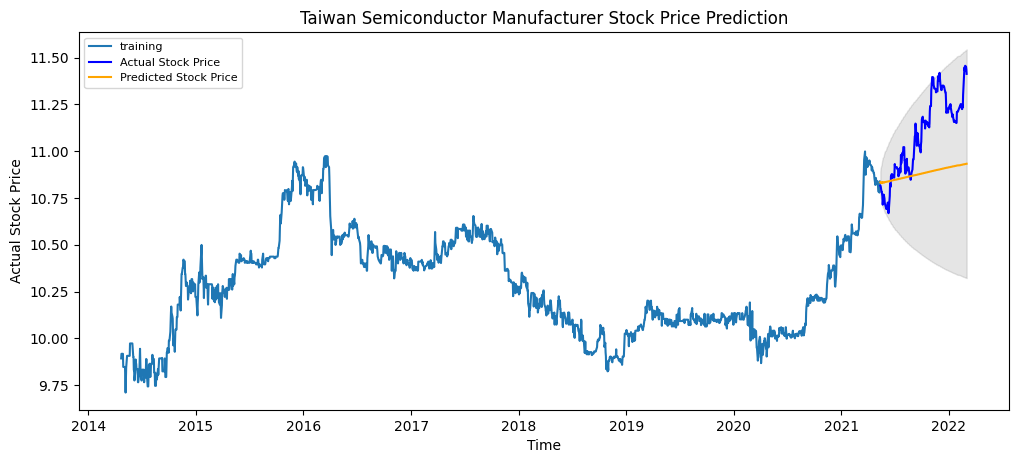

MSE: 0.07526427545747744
MAE: 0.22457940309925872
RMSE: 0.2743433532227042
MAPE: 0.020018127881563687


In [ ]:
def TMS_ARIMA():
  TMS = yf.download('TMS',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  TMS_df = pd.DataFrame(TMS)
  TMS_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for Taiwan Semiconductor Manufacturer')
  plt.plot(TMS_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  TMS_df_close = TMS_df['Close']
  TMS_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(TMS_df_close)

  result = seasonal_decompose(TMS_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  TMS_df_log = np.log(TMS_df_close)
  moving_avg = TMS_df_log.rolling(12).mean()
  std_dev = TMS_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = TMS_df_log[3:int(len(TMS_df_log)*0.9)], TMS_df_log[int(len(TMS_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(TMS_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(2,1,2))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(198,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('Taiwan Semiconductor Manufacturer Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

TMS_ARIMA()




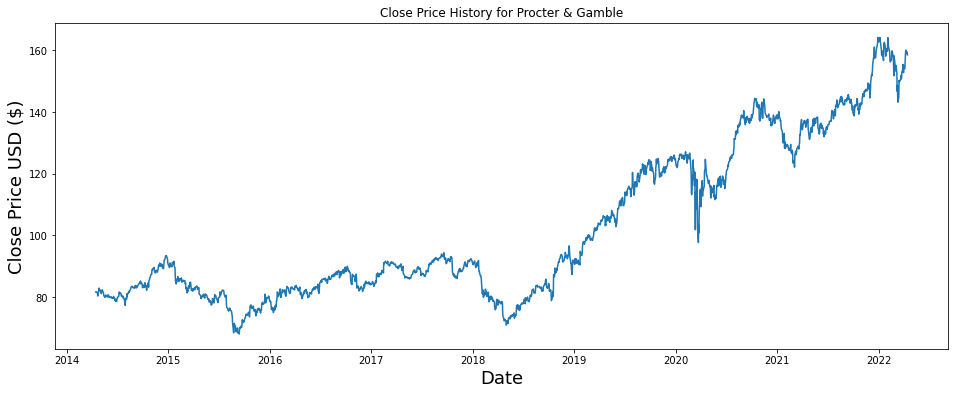

No handles with labels found to put in legend.


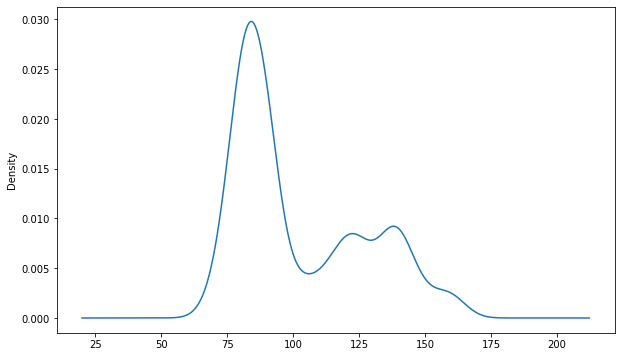

<Figure size 720x432 with 0 Axes>

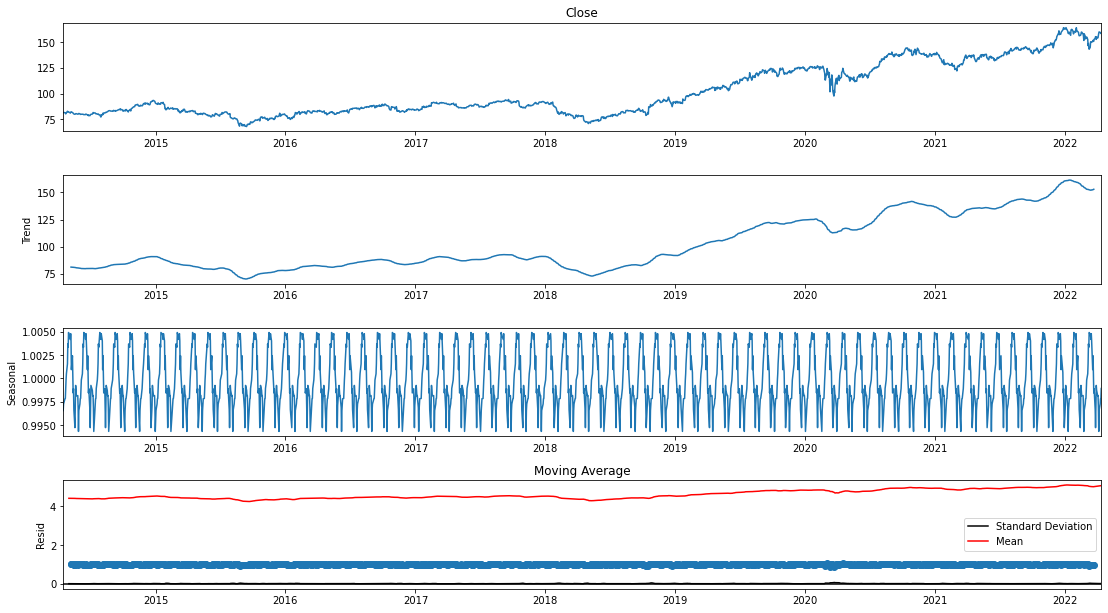

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10933.107, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10952.452, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10952.472, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10934.069, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10950.455, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-10950.432, Time=0.75 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-10948.453, Time=0.78 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-10953.149, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-10951.160, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-10951.104, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-10953.160, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-10951.159, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-10949.171, Time=0.52 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 4.999 seco

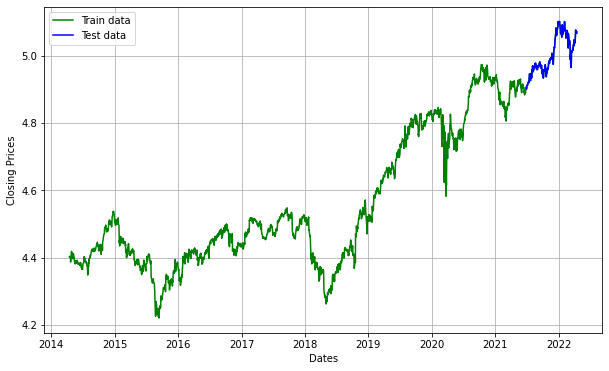

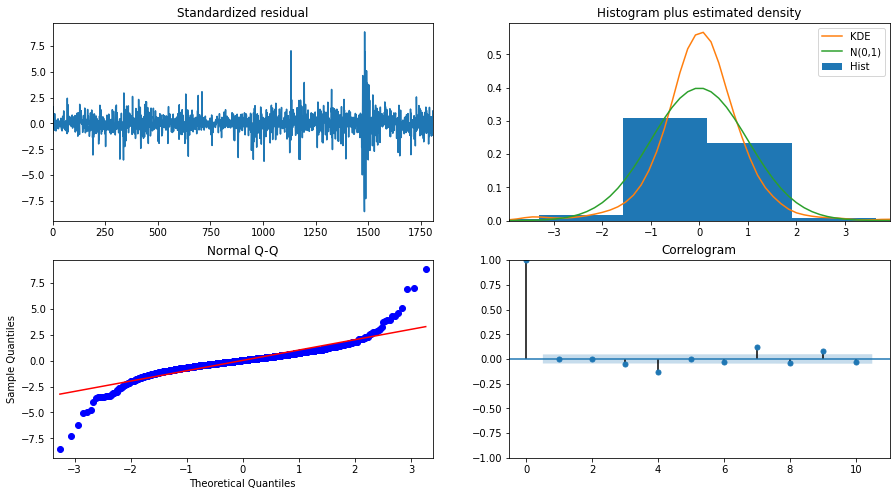

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1809
Model:                 ARIMA(1, 1, 0)   Log Likelihood                5479.226
Method:                       css-mle   S.D. of innovations              0.012
Date:                Sat, 16 Apr 2022   AIC                         -10952.452
Time:                        17:12:56   BIC                         -10935.951
Sample:                             1   HQIC                        -10946.362
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      1.138      0.255      -0.000       0.001
ar.L1.D.Close    -0.1083      0.023     -4.634      0.000      -0.154      -0.063
                                    Root

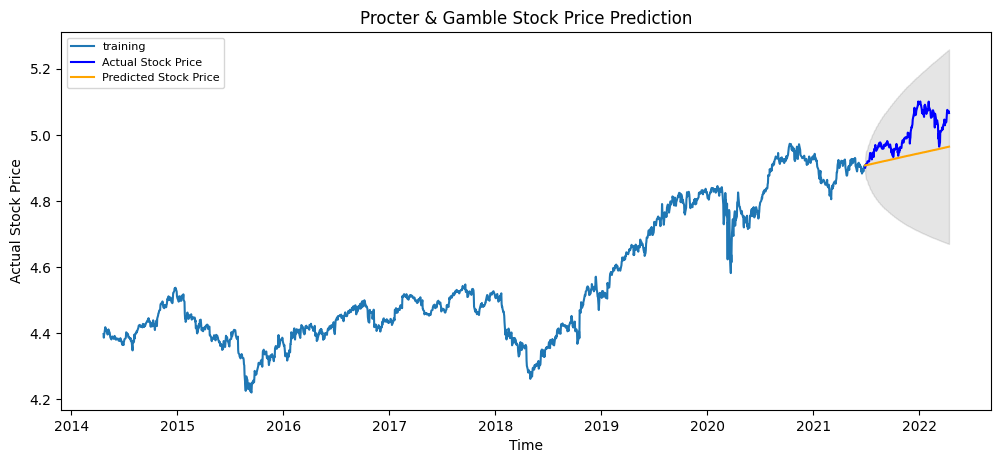

MSE: 0.006302594419276124
MAE: 0.06721647290000507
RMSE: 0.07938888095493049
MAPE: 0.013347597974005044


In [ ]:
def PG_ARIMA():
  PG = yf.download('PG',start=datetime.datetime.today() + relativedelta(years=-8),end=date.today(),progress=False)
  PG_df = pd.DataFrame(PG)
  PG_df
  plt.figure(figsize=(16,6))
  plt.title('Close Price History for Procter & Gamble')
  plt.plot(PG_df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.show()
  PG_df_close = PG_df['Close']
  PG_df_close.plot(kind='kde')
  def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    test_stationarity(PG_df_close)

  result = seasonal_decompose(PG_df_close, model='multiplicative', period= 30)
  fig = plt.figure()
  fig = result.plot()
  fig.set_size_inches(16, 9)

  rcParams['figure.figsize'] = 10, 6
  PG_df_log = np.log(PG_df_close)
  moving_avg = PG_df_log.rolling(12).mean()
  std_dev = PG_df_log.rolling(12).std()
  plt.legend(loc='best')
  plt.title('Moving Average')
  plt.plot(std_dev, color ="black", label = "Standard Deviation")
  plt.plot(moving_avg, color="red", label = "Mean")
  plt.legend()
  plt.show()

   #Spltting the dataset
  train_data, test_data = PG_df_log[3:int(len(PG_df_log)*0.9)], PG_df_log[int(len(PG_df_log)*0.9):]
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(PG_df_log, 'green', label='Train data')
  plt.plot(test_data, 'blue', label='Test data')
  plt.legend()
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  print(model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
  plt.show()
  model = ARIMA(train_data, order=(1,1,0))
  fitted = model.fit()
  print(fitted.summary())
  fc, se, conf = fitted.forecast(202,alpha=0.05)  # 95% confidence
  fc_series = pd.Series(fc,index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train_data, label='training')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
  plt.title('Procter & Gamble Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Actual Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
    # report performance
  mse = mean_squared_error(test_data, fc)
  print('MSE: '+str(mse))
  mae = mean_absolute_error(test_data, fc)
  print('MAE: '+str(mae))
  rmse = math.sqrt(mean_squared_error(test_data, fc))
  print('RMSE: '+str(rmse))
  mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
  print('MAPE: '+str(mape))

PG_ARIMA()


